In [14]:
from pathlib import Path
cwd = Path().resolve()
print(cwd)
import sys
sys.path.insert(0, cwd) 

conditionid = 'exp3'
specid = 'med-LEV-tot-LEV-BC-tdelay_gpy'
cond2 = 'tcut'
exp_path = '' + conditionid + '/'
csvsavepath = '_dmap_csv_' + conditionid + cond2+ specid + '/'
print(specid)

repo = str(cwd) +'/'

data_path = repo + exp_path + "/"
data_path2 = data_path
fig_path = repo + "testfig/"

#determine data for generating input and output maps
params = "smadMatrix.csv"
params2 = "outputMatrixTOTAL.csv"
timematrix = "timematrix.csv"
datamatrix = "dosageData.csv"
filename = data_path + params

#in this processed form, I find that using DMAPs does not improve the accuracy of representing the data above using timepoint combinations
#smad abundance vs Snail difference

#this is bad ass
from pathlib import Path
cwd = Path().resolve()
print(cwd)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as manimation

import matplotlib.tri as mtri

from scipy.integrate import odeint
from scipy.integrate import complex_ode
import scipy.spatial.distance
import scipy
import scipy.interpolate
import scipy.signal

import re



from dmap_sp_chrisNEW import *

import dmap_sp_chrisNEW
import importlib
importlib.reload(dmap_sp_chrisNEW)




import os
print(not (os.path.isdir(fig_path)))
if not (os.path.isdir(fig_path)):
    print('making' + fig_path)
    os.mkdir(fig_path)

name = "16CHRIS"
%matplotlib inline

/Users/frick/Dparams/DParams_2017_04_17_v3
med-LEV-tot-LEV-BC-tdelay_gpy
/Users/frick/Dparams/DParams_2017_04_17_v3
False


In [15]:

def funky(x, p1,p2,p3,p4):
    return p1*(x**3) + p2*(x**2) + p3*(x) + p4
#   return p1*np.cos(p2*x) + p2*np.sin(p1*x)

def iqr_outlier(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3-q1
    outidx = (x < (q1 - (1.5 * iqr))) | (x > (q3 + (1.5 * iqr)))
    return outidx

def residuals_of_poly4_fit(x0,y0):
    xidx = np.argsort(x0)
    xix = x0[xidx]
    yix = y0[xidx]
    poptx, pcovx = scipy.optimize.curve_fit(funky, xix, yix,p0=(1.0,0.2,0.1,0.1),maxfev=100000)
    px1 = poptx[0]
    px2 = poptx[1]
    px3 = poptx[2]
    px4 = poptx[3]
    fy = funky(xix,px1,px2,px3,px4)
    residuals1 = (yix - fy)

    xidx = np.argsort(y0)
    xiy = x0[xidx]
    yiy = y0[xidx]
    popty, pcovy = scipy.optimize.curve_fit(funky, yiy, xiy,p0=(1.0,0.2,0.1,0.1),maxfev=100000)
    py1 = popty[0]
    py2 = popty[1]
    py3 = popty[2]
    py4 = popty[3]
    fx = funky(yiy,py1,py2,py3,py4)
    residuals2 = (xiy - fx)

#     residx1 = iqr_outlier(residuals1**2)
#     residx2 = iqr_outlier(residuals2**2)
    
    residx1 = numpy.zeros(np.shape(residuals1), dtype=bool)
    residx2 = numpy.zeros(np.shape(residuals2), dtype=bool)
    
    if sum(residuals1[~residx1]**2)<sum(residuals2[~residx2]**2):
        fres = sum(residuals1[~residx1]**2)
        popt = poptx
        xout = xix
        yout = funky(xix,popt[0],popt[1],popt[2],popt[3])
        iout = 0
    else:
        fres = sum(residuals2[~residx2]**2)
        popt = popty
        xout = funky(yiy,popt[0],popt[1],popt[2],popt[3])
        yout = yiy
        iout = 1

    return fres,popt,xout,yout,iout

def rescaleevecs(evecs,evals,eps_eps):
    showev = evecs
    showevl = evals

#     showevl = (np.abs(showevl))**(np.median(eps_eps)/4)
    
    shave = showev.copy()
    for i in range(showevl.shape[0]):
        shave[:,i] = showevl[i]*showev[:,i]
        
    return shave

def autodparam(evecs,evals,eps_eps,inoutstr):
    print('working on '+inoutstr)
    PTS = 5
    w1 = evecs[:,0]

    showev = evecs
    showevl = evals
    showevl = (np.abs(showevl))**(np.median(eps_eps)/4)
    shave = showev.copy()
    for i in range(showevl.shape[0]):
        shave[:,i] = showevl[i]*showev[:,i]

#     yl1 = np.percentile(shave,0.1)
#     yl2 = np.percentile(shave,99.9)
    yl1 = np.percentile(evecs,0.1)
    yl2 = np.percentile(evecs,99.9)

    std = np.zeros(showevl.shape)
    
    # plot scatter of each dparam
    # determine standard deviation with outliers removed
    fig,ax = plt.subplots(PTS,PTS,figsize=(8,8),sharex=True,sharey=True)
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    fig.suptitle(inoutstr+'_dparams', fontsize=16)
    for i in range(PTS):
        for k in range(PTS):
            eigenindex = i*PTS+k
            x = range(0,len(showev[:,0]))
            y = shave[:,eigenindex]
#             y = evecs[:,eigenindex]
            sc1 = ax[i,k].scatter(x,y, 5, w1, cmap='jet')
            outy = iqr_outlier(y)
#             std[eigenindex] = np.absolute(np.std(y[~outy]))  
            std[eigenindex] = np.absolute(np.std(y))  
            ax[i,k].set_title([i,k,eigenindex])
            ax[i,k].set_ylim((yl1 - np.abs(yl1*0.5)),(yl2 + yl2))

    stdcut0 = np.max(std)/stdcut
    std = std-np.min(std[1:-1])
    stdcop = std.copy()
    
    #plot standard deviation of each dparam coordinate
    fig = plt.figure()
    plt.plot(np.abs(std),'k.-')
    plt.xlabel('dparam')
    plt.ylabel('stdev')

    
    #make plot showing stdev vals for each dparam
    xx = np.linspace(0,len(std)-1,len(std))
    yy = np.ones([len(std),1])*stdcut0
    plt.plot(xx,yy)
    
    keeperstdidx = np.abs(std)>stdcut0
    boolidx = numpy.array(keeperstdidx, dtype=bool)
    boolidx[0]=False
    keeprange = np.linspace(0,len(keeperstdidx)-1,len(keeperstdidx))
    keeperstd = keeprange[boolidx]
    
    #######

    #now that we know that eval[1] and evec[1] have significant variability plot other things with respect
    #to them. If they are functions of [1] then they are not important

    
    # sort the chosen eigenvectors based on who has max STDdev
    stdabs = np.abs(stdcop)
    keepvec =keeperstd.astype(int)
    stdval = stdabs[keepvec]
    cvec0 = np.argsort(stdval)
    cvec = cvec0[::-1]

    
    keepint =keeperstd.astype(int)
    keepint = keepint[cvec]
    shavesub = shave[:,keepint]
    tauscale = np.percentile(shavesub,95)-np.percentile(shavesub,5)
    tauscale=1
    fig,ax = plt.subplots(len(keeperstd),len(keeperstd),figsize=(8,8),sharex=True,sharey=True)
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    fig.suptitle(inoutstr+'_dparams', fontsize=16)
    
    tauraall = np.zeros([len(showevl),len(showevl)])
    for i in range(len(showevl)):
        for j in range(len(showevl)):
            eigy1=i
            eigy2=j
            x = showevl[eigy1]*showev[:,eigy1]
            y = showevl[eigy2]*showev[:,eigy2]

            outx = iqr_outlier(x)
            outy = iqr_outlier(y)
            outidx = outx|outy

            x0 = x[~outidx]
            y0 = y[~outidx]
            #             print(x0.shape,x.shape)
            xidx = np.argsort(x0)

#             fres,popt,xout,yout,iout = residuals_of_poly4_fit(x0,y0)
#             tauraall[i,j]=fres/np.sum([np.std(x0),np.std(y0)])
            
    #determine the correlation between different eigenvectors to determine unique dparams
    taura = np.zeros([len(keepint),len(keepint)])
    for i in range(len(keepint)):
        for j in range(len(keepint)):
            eigy1=keepint[i]
            eigy2=keepint[j]
#             x = showevl[eigy1]*showev[:,eigy1]
#             y = showevl[eigy2]*showev[:,eigy2]
            x = showev[:,eigy1]
            y = showev[:,eigy2]
            #using eigenvector without eigenvalue multiplication makes it easier to compare residuals values. 
        
#             tau, p_value = scipy.stats.kendalltau(x, y)
            
            outx = iqr_outlier(x)
            outy = iqr_outlier(y)
            outidx = outx|outy
 
            x0 = x[~outidx]
            y0 = y[~outidx]
#             print(x0.shape,x.shape)
            xidx = np.argsort(x0)
            
            fres,popt,xout,yout,iout = residuals_of_poly4_fit(x0,y0)
             
#             tauscale = np.sum(np.abs([np.std(x0),np.std(y0)]))   
            tauscale=1
            taur = np.round(fres,decimals=3)/tauscale
            taura[i,j]=np.absolute(taur)

            std = np.std(y)
#             print("i=",i,"j=",j)

            if len(keepint)>1:
                sc1 = ax[i,j].scatter(x,y, 5, w1, cmap='jet')
                ax[i,j].plot(xout,yout)
                ax[i,j].set_title([eigy1,eigy2, '%1.2f' % taur])
            else:
                sc1 = ax.scatter(x,y, 5, w1, cmap='jet')
                ax.plot(xout,yout)
                ax.set_title([eigy1,eigy2, '%1.2f' % taur])
            
            
#             if iout==0:
#                 ax[i,j].plot(xout,funky(xout,popt[0],popt[1],popt[2],popt[3]))
#             else:
#                 ax[i,j].plot(funky(yout,popt[0],popt[1],popt[2],popt[3]),yout)

                
           


    fig,ax = plt.subplots(1,1,sharey=True)
    plt.imshow( np.absolute(taura), cmap='viridis')
    plt.colorbar(extend='both')
#     plt.clim(0, 0.01);

#     tcut = np.max(tauraall[:])/taurcut
    tcut = taurcut

    fig,ax = plt.subplots(1,taura.shape[1],sharex=True,sharey=True,figsize=(12,3))
    for j in range(taura.shape[1]):
        xvec = np.linspace(0,taura.shape[1]-1,taura.shape[1])
        taurvec = taura[:,j]
        boolbool = np.ones(taurvec.shape,dtype=bool)
#         boolbool[j] = False
        yvec = np.ones(taurvec.shape)*(tcut)
        xv = xvec[boolbool]
        yv = taurvec[boolbool]
        yy = yvec[boolbool]
        ax[j].plot(xv[j+1:len(xv)],yv[j+1:len(xv)],'*-')
#         plt.ylim([0,cutoff*8])
        plt.xlim([0,len(boolbool)])
        ax[j].plot(xvec,yvec)
        ax[j].text(1, tcut*0.5, 'is a function of %g' % j)
#         ax[j].legend(xx[0:taura.shape[1]])



    #############

    print(tcut)
    removeme=[]
    for i in range(taura.shape[0]):
    #         if i not in removeme:
        tidx = taura[i,:]<(tcut) #find anything that is tightly correlated
        tidx[i] = False #set self correlation = false
        nvec = np.linspace(0,len(tidx)-1,len(tidx))
        if i>=i:
            tidx[0:i]=False
        nvec = np.linspace(0,len(tidx)-1,len(tidx))
        rm = nvec[tidx] 
        removeme = np.append(removeme,rm.astype(int))


      
    chuckz = np.unique(removeme.astype(int))
    tbidx = np.ones((keeperstd.shape), dtype=bool)
    tbidx[chuckz]=False
    keepdparams = keepint[tbidx]
    print('good '+inoutstr+' dparams are:', keepdparams.astype(int))
    return keepdparams

def plot_trajectories_based_on_dparam(tvec,traj,evecs_0,ev_0,strstr):
    #plot the Smad trajectories colored by info
    fig,ax = plt.subplots(2,len(ev_0),figsize=(len(ev_0)*3,3),sharey=False)

    x = np.transpose(tvec)
    y = np.transpose(traj)
    for j in range(2):
        for i in range(len(ev_0)):
#             print(ev_0)
            lp = np.linspace(0,1,y.shape[1])
            ev_in_v = ev_0[i]
            hh = np.argsort(evecs_0[:,ev_in_v])
            cmvec = lp[hh]
            color=iter(plt.cm.viridis(lp))
            for k in range(y.shape[1]):
                xs = x[:,hh[k]]
                xs0 = numpy.where(xs<=0)
                tv0 = xs0[0]
                ys = y[:,hh[k]]

                if j==1:
                    ys2 = np.divide(ys,ys[tv0[-1]])
                else:
                    ys2 = ys

                c=next(color)
                if len(ev_0)==1:
                    ax[j].plot(ys2,c=c,linewidth=0.5)
                    ax[j].set_title(strstr+' dim %g' % (i+1))
                else:
                    ax[j,i].plot(ys2,c=c,linewidth=0.5)
                    ax[j,i].set_title(strstr+' dim %g' % (i+1))

                
def shaver(evecs,evals,eps_eps):
    showev = evecs
    showevl = evals
    showevl = (np.abs(showevl))**(np.median(eps_eps)/4)
    shave = showev.copy()
    for i in range(showevl.shape[0]):
        shave[:,i] = showevl[i]*showev[:,i]
    return shave

def shaverscale(evecs,evals,eps_eps):
    showev = evecs
    showevl = evals
    showevl = np.reciprocal(evals)
    shave = showev.copy()
    for i in range(showevl.shape[0]):
        shave[:,i] = showevl[i]*showev[:,i]
    return shave


def autodparam2(evecs,evals,eps_eps,inoutstr):
    print('working on '+inoutstr)
    PTS = 5
    w1 = evecs[:,0]

    showev = evecs
    showevl = evals

    showevl = (np.abs(showevl))**(np.median(eps_eps)/4)
    
    shave = showev.copy()
    for i in range(showevl.shape[0]):
        shave[:,i] = showevl[i]*showev[:,i]

    yl1 = np.percentile(shave,0.1)
    yl2 = np.percentile(shave,99.9)

    std = np.zeros(showevl.shape)
    
    # plot scatter of each dparam
    fig,ax = plt.subplots(PTS,PTS,figsize=(8,8),sharex=True,sharey=True)
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    fig.suptitle(inoutstr+'_dparams', fontsize=16)
    for i in range(PTS):
        for k in range(PTS):
            eigenindex = i*PTS+k
            x = range(0,len(showev[:,1]))
            y = showevl[eigenindex]*showev[:,eigenindex]
            sc1 = ax[i,k].scatter(x,y, 5, w1, cmap='jet')
            outy = iqr_outlier(y)
            std[eigenindex] = np.absolute(np.std(y[~outy]))  
            ax[i,k].set_title([i,k,eigenindex])
            plt.ylim((yl1 - np.abs(yl1*0.5)),(yl2 + yl2))

    stdcut0 = np.max(std)/stdcut
    std = std-np.min(std[1:-1])
    stdcop = std.copy()
    #plot standard deviation of each dparam coordinate
    fig = plt.figure()
    plt.plot(np.abs(std),'k.-')
    plt.xlabel('dparam')
    plt.ylabel('stdev')

    
    xx = np.linspace(0,len(std)-1,len(std))
    yy = np.ones([len(std),1])*stdcut0
    plt.plot(xx,yy)
    keeperstdidx = np.abs(std)>stdcut0
    boolidx = numpy.array(keeperstdidx, dtype=bool)
    boolidx[0]=False
    keeprange = np.linspace(0,len(keeperstdidx)-1,len(keeperstdidx))
    keeperstd = keeprange[boolidx]
    keepvec =keeperstd.astype(int)
    return keepvec
    
print('done')

done


In [16]:


crs = open(filename, "r")
counter = 1
for columns in ( raw.strip().split() for raw in crs ):  
    if counter > 1:
        break
#     print (columns[0])
    counter+=1


# load data files and rescale as necessary
datamatrix_path_in = data_path + params
datamatrix_path_out = data_path + params2
timematrix_path = data_path + timematrix
dosage_path = data_path + datamatrix

observed_data_in0 = np.genfromtxt(datamatrix_path_in, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
observed_data_out0 = np.genfromtxt(datamatrix_path_out, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
time_data = np.genfromtxt(timematrix_path, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
dosage_data = np.genfromtxt(dosage_path, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

(425, 48)


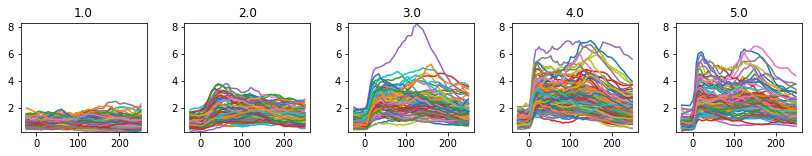

In [17]:
def plot_all_doses(yset,t1,dosage_data):
    udose = np.unique(dosage_data)
    fig = plt.figure(figsize=(14,2))
    for i in range(len(udose)):
        u = udose[i]
        dd = np.where(dosage_data==u)
        didx = dd[0]
        ax = fig.add_subplot('1'+str(len(udose))+str(i+1))
        x = t1[didx,:]
        y = yset[didx,:]
        plt.plot(x.T,y.T)
        plt.ylim(np.min(yset.flatten()),np.max(yset.flatten()))
        plt.title(u)
        
    fig.subplots_adjust(wspace=0.3)
  
yset = observed_data_in0.copy()
plot_all_doses(yset,time_data.copy(),dosage_data)  
print(yset.shape)
#dosage_data==1 is unstimulated

In [18]:
observed_data_in = observed_data_in0.copy()
observed_data_out = observed_data_out0.copy()                      
in0 = observed_data_in.copy() 
out0 = observed_data_out.copy()
t0 = time_data.copy()


## i think interpolating the data is important to get everything time synchronized
ogdin = observed_data_in.copy()
x = np.linspace(np.min(time_data[:]),np.max(time_data[:]),time_data.shape[1])
time_datanew = time_data
for k in range(0,observed_data_in.shape[0]): 
    xp = time_data[k,:]
    fp = ogdin[k,:]
    yp = numpy.interp(x, xp, fp, left=None, right=None, period=None)
    observed_data_in[k,:] = yp
    time_datanew[k,:] = x
    
## i think interpolating the data is important to get everything time synchronized
ogdout = observed_data_out.copy()
x = np.linspace(np.min(time_data[:]),np.max(time_data[:]),time_data.shape[1])
time_datanew = time_data
for k in range(0,observed_data_in.shape[0]): 
    xp = time_data[k,:]
    fp = ogdout[k,:]
    yp = numpy.interp(x, xp, fp, left=None, right=None, period=None)
    observed_data_out[k,:] = yp
    time_datanew[k,:] = x
    
time_data = time_datanew


observed_data_in[np.isnan(observed_data_in)] = 0
observed_data_out[np.isnan(observed_data_out)] = 0
print(np.sum(np.isnan(observed_data_in)))


0


/Users/frick/Dparams/DParams_2017_04_17_v3/_dmap_csv_exp3tcutmed-LEV-tot-LEV-BC-tdelay_gpy/


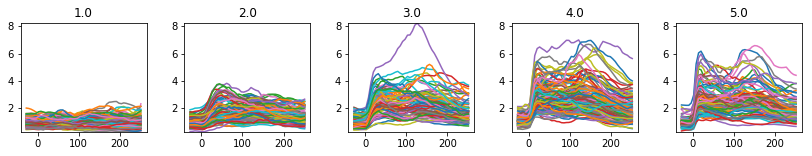

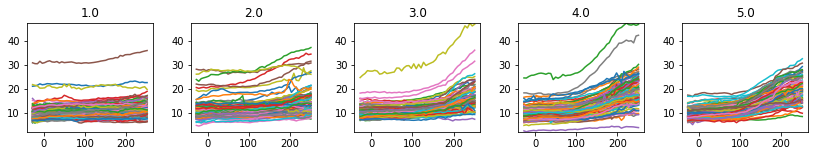

In [19]:
plot_all_doses(observed_data_in.copy(),time_data.copy(),dosage_data)  
plot_all_doses(observed_data_out.copy(),time_data.copy(),dosage_data)  

newcsvpath = repo + csvsavepath

if not os.path.exists(newcsvpath):
    os.makedirs(newcsvpath)
print(newcsvpath)
a = numpy.asarray(observed_data_in)
numpy.savetxt(newcsvpath+"smadMatrix_PYdat.csv", a, delimiter=",")
a = numpy.asarray(observed_data_out)
numpy.savetxt(newcsvpath+"outputMatrixDIFF_PYdat.csv", a, delimiter=",")
a = numpy.asarray(time_data)
numpy.savetxt(newcsvpath+"timeMatrix_PYdat.csv", a, delimiter=",")

In [20]:
 
print('observed_data_in', observed_data_in.shape)
print('observed_data_out', observed_data_out.shape)
print('time_data', time_data.shape)

# observed_data_in = np.gradient(observed_data_in,axis = 1)
#transform each trajectory to be scaled by the minimum and maximum of the population
ogdin = observed_data_in.copy()
for k in range(0,observed_data_in.shape[0]):  
    observed_data_in[k,:] = observed_data_in[k,:] - np.min(ogdin[:])
    observed_data_in[k,:] = observed_data_in[k,:] / (np.max(ogdin[:])-np.min(ogdin[:]))
 

#transform each trajectory to be scaled by the minimum and maximum of the populationz
ogdout = observed_data_out.copy()
for k in range(0,observed_data_out.shape[0]):   
    observed_data_out[k,:] = observed_data_out[k,:] - np.min(ogdout[:])
    observed_data_out[k,:] = observed_data_out[k,:] / (np.max(ogdout[:])-np.min(ogdout[:]))

    





def zero_one_individ(data):
    for k in range(0,data.shape[1]):   
        data[:,k] = data[:,k] - np.min(data[:,k])
        data[:,k] = data[:,k] / np.max(data[:,k])
    #     observed_data_in[:,k] = np.log(observed_data_in[:,k]+1e-0)
        data[:,k] = np.sqrt(data[:,k])
    return data

def zero_one_population(data):
    ogdingrad = data.copy()
    for k in range(0,data.shape[0]):  
        data[k,:] = data[k,:] - np.min(ogdingrad[:])
        data[k,:] = data[k,:] / (np.max(ogdingrad[:])-np.min(ogdingrad[:]))
    return data

def zero_one_dimension(data):
    ogdingrad = data.copy()
    for i in range(0,data.shape[1]):  
        dimdat = ogdingrad[:,i]
        for k in range(0,data.shape[0]):  
            data[k,i] = data[k,i] - np.min(dimdat[:])
            data[k,i] = data[k,i] / (np.max(dimdat[:])-np.min(dimdat[:]))
    return data





datain = np.hstack([observed_data_in])
dataout = np.hstack([observed_data_out]) #hstack does horzcat in matlab, and in this case it does nothing
print(datain.shape)

observed_data_in (425, 48)
observed_data_out (425, 48)
time_data (425, 48)
(425, 48)


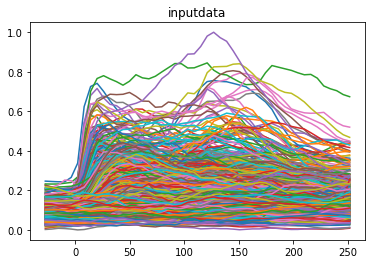

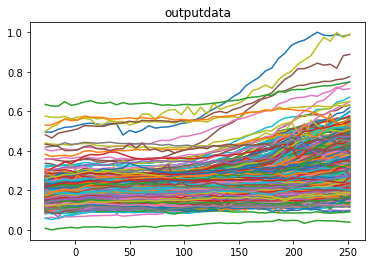

In [21]:
plt.plot(time_data.T,datain.T)
plt.title('inputdata')
plt.show()

plt.plot(time_data.T,dataout.T)
plt.title('outputdata')
plt.show()

In [95]:
##########################################################################################
def eigcut(evals,evecs,eps,cut):   
    eigen_val_in = np.exp(np.log(evals)/np.median(eps))
    eidx = np.where(eigen_val_in>cut)
    
    ff = eidx[0]
    if len(ff)<4:
        ff = [0,1,2,3,4,5]
#     plt.semilogy(eigen_val_in[0::],'r')
#     plt.show()
#     print(eidx)
#     ppo
    return ff
        
def inoutdmap(datain,dataout,epsfact):
    import sklearn.metrics as sm
    data = datain.copy()
    dist_true = sm.pairwise_distances(data,metric = 'euclidean')
    meddist_in = np.median(dist_true)
    print('meddist_in',meddist_in)

    data = dataout.copy()
    dist_true = sm.pairwise_distances(data,metric = 'euclidean')
    meddist_out = np.median(dist_true)
    print('meddist_out',meddist_out)
    print(dist_true.shape)
    ein = {}
    eout ={}
    numcut = {}
    numcutsmad={}
    numcutsnail={}
    for i in range(0,len(epsfact)):
    
        epsf = epsfact[i]
    
        # get input data dmaps
        data = datain.copy()
        data_type = "compute dmatrix"
        n_evecs = 30
        LB_flag = 1
        epsilon = meddist_in*epsf
#         print(epsilon)
        state_dependent_eps = True
        cutoff_num=-1
        estimate_eps = False


        evecs_in,evals_in,_,_,_,eps_in  = dmap_sp(data,epsilon,
                                            n_evecs,LB_flag,data_type,
                                            estimate_eps=estimate_eps,
                                            cutoff_num=cutoff_num,
                                            state_dependent_eps=state_dependent_eps,verbose=False)

        ################################################################################
        # get output data dmaps
        data = dataout.copy()
        data_type = "compute dmatrix"
        LB_flag = 1
        epsilon = meddist_out*epsf
        state_dependent_eps = True
        cutoff_num=-1
        estimate_eps = False


        evecs_out,evals_out,_,_,_,eps_out = dmap_sp(data,epsilon,
                                            n_evecs,LB_flag,data_type,
                                            estimate_eps=estimate_eps,
                                            cutoff_num=cutoff_num,
                                            state_dependent_eps=state_dependent_eps,verbose=False)


        cut_in = (1*(10**(-14)))
        eidx = eigcut(evals_in,evecs_in,eps_in,cut_in)
        ein[i] = [evecs_in[:,eidx],evals_in[eidx],eps_in[eidx],1]
        numcutsmad[i] = (evecs_in[:,eidx]).shape[1]
        
        eidx = eigcut(evals_out,evecs_out,eps_out,cut_in)
        eout[i] = [evecs_out[:,eidx],evals_out[eidx],eps_out[eidx],1]
        numcutsnail[i] = (evecs_out[:,eidx]).shape[1]
        
        ein[i] = [evecs_in,evals_in,eps_in,1]
        eout[i] = [evecs_out,evals_out,eps_out,1]
        numcutsmad[i] = (evecs_in).shape[1]
        numcutsnail[i] = (evecs_out).shape[1]

        print('i=', str(i),end=" ")
    print('done')  
    numcut['smad']=numcutsmad
    numcut['snail']=numcutsnail
    return eout,ein,epsfact,numcut 

In [96]:
# import importlib
importlib.reload(dmap_sp_chrisNEW)

num_eps=50
epsfact = np.logspace(np.log10(0.005),np.log10(6),num_eps)
eout,ein,epsfact,numcut = inoutdmap(datain,dataout,epsfact)

meddist_in 0.8394459904019839
meddist_out 0.5516446349977263
(425, 425)
i= 0 i= 1 i= 2 i= 3 i= 4 i= 5 i= 6 i= 7 i= 8 i= 9 i= 10 i= 11 i= 12 i= 13 i= 14 i= 15 i= 16 i= 17 i= 18 i= 19 i= 20 i= 21 i= 22 i= 23 i= 24 i= 25 i= 26 i= 27 i= 28 i= 29 i= 30 i= 31 i= 32 i= 33 i= 34 i= 35 i= 36 i= 37 i= 38 i= 39 i= 40 i= 41 i= 42 i= 43 i= 44 i= 45 i= 46 i= 47 i= 48 i= 49 done


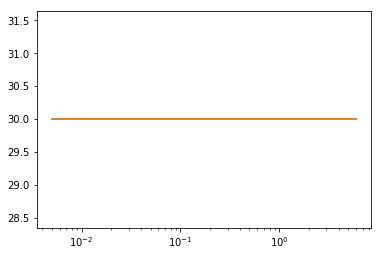

In [97]:
plt.semilogx(epsfact,numcut['smad'].values())
plt.semilogx(epsfact,numcut['snail'].values())
plt.show()
# epsfact = np.logspace(np.log10(0.005),np.log10(6),num_eps)
# eout,toss,epsfact,numcut = inoutdmap(datain,dataout,epsfact)
# plt.plot(numcut.values())
# plt.show()

In [98]:
### quantify the accuracy of diffusion map coordinates (knn) relative to traces at random
#validate accuracy (test2), using evecs only in 3d
def accuracytester7(listcomb,evecs_in,k,ploton,testvec,smadsnail,seedval,datatrajectories):

    
#     distmetric = 'mahalanobis'
    distmetric = 'euclidean'
    from time import time
    lt=time()
    data = datatrajectories
    dvec = data[1,:]

#     import sklearn.metrics as sm
    
    numpy.random.seed(seed=None)
    distMatrix = scipy.spatial.distance.pdist(data, distmetric)
    distMatrix = scipy.spatial.distance.squareform(distMatrix)
    dist_true = distMatrix.copy()
#     dist_true = sm.pairwise_distances(data,metric = distmetric)
    sort_dist_true = np.sort(dist_true,axis=1)
    arg_dist_true = np.argsort(dist_true,axis=1)

    closestbest = arg_dist_true[:,1:k+1]
    distbest = sort_dist_true[:,1:k+1]
    nbsbest = closestbest[0]


    kout_in1i = np.zeros(len(listcomb))
    koutDPrnd_in1i = np.zeros(len(listcomb))
    koutDPbest_in1i = np.zeros(len(listcomb))
    for i in range(len(listcomb)):
        tmat = listcomb[i]    
        xyz=evecs_in[:,tmat]

#         dist = sm.pairwise_distances(xyz,metric = distmetric)
#         distmetric = 'euclidean'
        distMatrix = scipy.spatial.distance.pdist(xyz, distmetric)
        distMatrix = scipy.spatial.distance.squareform(distMatrix)
        dist = distMatrix.copy()
        arg_dist = np.argsort(dist)
        closest = arg_dist[:,1:k+1]
        
    
        kvecsum = np.zeros(data.shape[0])
        kvecsumrnd = np.zeros(data.shape[0])
        kvecsumbest = np.zeros(data.shape[0])
        numpy.random.seed(seed=None)
        for j in range(data.shape[0]):
            #find knn in 49, compute distance in 49 dim space
            #find knn in DMap, compute distance in 49 dim space

            cp1 = j
            dmap_knn = closest[cp1,0:k]
            ndim_knn = closestbest[cp1,0:k]
            rand_knn = np.random.randint(0,data.shape[0],k);

            dmap_dist = dist_true[cp1,dmap_knn]
            ndim_dist = dist_true[cp1,ndim_knn]
            rand_dist = dist_true[cp1,rand_knn]

            kvecsum[j] = np.sum(dmap_dist)
            kvecsumrnd[j] = np.sum(rand_dist)
            kvecsumbest[j] = np.sum(ndim_dist)

        kout_in1i[i] = np.sum(kvecsum)
        koutDPrnd_in1i[i] = np.sum(kvecsumrnd)
        koutDPbest_in1i[i] = np.sum(kvecsumbest)
        
        if((time()-lt)>5):
            lt = time()
#             print(np.round((i/len(listcomb))*100))
#             print(np.round((i/len(listcomb))*100), end='\r')

#     print('done')
        
    return kout_in1i, koutDPrnd_in1i, koutDPbest_in1i

In [99]:

def accbar1(k,datatest,evecs_test,smadsnail):
    from itertools import combinations
    listcomb = [[x,x] for x in range(evecs_test.shape[1])]
    shave_i = evecs_test
    testvec = [0,1]

    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)

        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i



def accbar2(k,datatest,evecs_test,smadsnail):
    from itertools import combinations
#     listcomb = [[x,x] for x in range(evecs_test.shape[1])]
    comb = combinations(range(evecs_test.shape[1]),2)
    listcomb = list(comb)
    shave_i = evecs_test
    testvec = [0,1]
    print(len(listcomb))
    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)
        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i

def accbar3(k,datatest,evecs_test,smadsnail):
    from itertools import combinations
    comb = combinations(range(evecs_test.shape[1]),3)
    listcomb = list(comb)
    shave_i = evecs_test
    testvec = [0,1,2]
    print(len(listcomb))
    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)
        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i

def accbar1_2(k,goodin,datatest,evecs_test,smadsnail):
    from itertools import combinations
    comb = combinations(range(evecs_test.shape[1]),1)
    listcomb = list(comb)
    for i in range(len(listcomb)):
        tmat = listcomb[i]
        t1 = goodin[0]
        t2 = int(tmat[0])
        ev_i = [t1,t2]
        listcomb[i] = ev_i

    shave_i = evecs_test
    testvec = [0,1,2]
#     print(len(listcomb))
    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)
        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i

def accbar12_3(k,goodin,datatest,evecs_test,smadsnail):
    from itertools import combinations
    comb = combinations(range(evecs_test.shape[1]),1)
    listcomb = list(comb)
    for i in range(len(listcomb)):
        tmat = listcomb[i]
        t1 = int(goodin[0])
        t2 = int(goodin[1])
        t3 = int(tmat[0])
        ev_i = [t1,t2,t3]
        listcomb[i] = ev_i

    shave_i = evecs_test
    testvec = [0,1,2]
#     print(len(listcomb))
    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)
        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i

def accbar123_4(k,goodin,datatest,evecs_test,smadsnail):
    from itertools import combinations
    comb = combinations(range(evecs_test.shape[1]),1)
    listcomb = list(comb)
    for i in range(len(listcomb)):
        tmat = listcomb[i]
        t1 = int(goodin[0])
        t2 = int(goodin[1])
        t3 = int(goodin[2])
        t4 = int(tmat[0])
        ev_i = [t1,t2,t3,t4]
        listcomb[i] = ev_i

    shave_i = evecs_test
    testvec = [0,1,2,3]
#     print(len(listcomb))
    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)
        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i

def accbar_multiDEF(k,goodin,datatest,evecs_test,smadsnail):

    ev_i = [int(x) for x in goodin]
    listcomb = [ev_i]

    shave_i = evecs_test
    testvec = [int(x) for x in range(0,len(goodin))]
    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)
        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i


def accbar3_21(k,datatest,evecs_test,smadsnail):
    from itertools import combinations
    comb = combinations(range(evecs_test.shape[1]),2)
    listcomb = list(comb)
    for i in range(len(listcomb)):
        tmat = listcomb[i]
        t1 = int(1)
        t2 = int(tmat[0])
        t3 = int(tmat[1])
        ev_i = [t1,t2,t3]
        listcomb[i] = ev_i

    shave_i = evecs_test
    testvec = [0,1,2]
    print(len(listcomb))
    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)
        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i
def accbar3_21(k,datatest,evecs_test,smadsnail):
    from itertools import combinations
    comb = combinations(range(evecs_test.shape[1]),2)
    listcomb = list(comb)
    for i in range(len(listcomb)):
        tmat = listcomb[i]
        t1 = int(1)
        t2 = int(tmat[0])
        t3 = int(tmat[1])
        ev_i = [t1,t2,t3]
        listcomb[i] = ev_i

    shave_i = evecs_test
    testvec = [0,1,2]
    print(len(listcomb))
    kout_in1i, koutDPrnd_in1i,koutDPbest_in1i =  accuracytester7(listcomb,shave_i,k,'on',testvec,smadsnail,seedval,datatest)
        
    listcomb1 = listcomb
    return listcomb1, kout_in1i, koutDPrnd_in1i, koutDPbest_in1i


def accbar1plot(kout_in1i,koutDPbest_in1i,koutDPrnd_in1i,listcomb1,smadsnail):
    #determine accuracy of DParams (1 param)
    ratiovec = np.reciprocal(kout_in1i)/np.reciprocal(koutDPbest_in1i)
    # plt.plot(ratiovec)

    newarg = np.argsort(ratiovec)
    ratiosort = ratiovec[newarg]

    a = np.argmax(ratiovec)
    newin = -1

    vv = listcomb1[newarg[newin]]

    top5 = np.asarray([str(listcomb1[newarg[newin]]) for newin in [-5,-4,-3,-2,-1]])
    bot5 = np.asarray([str(listcomb1[newarg[newin]]) for newin in [0,1,2,3,4]])
    top5val = [ratiosort[newin] for newin in [-5,-4,-3,-2,-1]]
    bot5val = [ratiosort[newin] for newin in [0,1,2,3,4]]

    xticks = np.hstack([bot5,top5])

    fig = plt.figure(figsize=(3,3))
    plt.bar(range(10),np.hstack([bot5val,top5val]))

    fsize=12
    plt.title('Accuracy: '+smadsnail+ ' combinations',fontsize=fsize)
    plt.xticks(range(10),xticks,fontsize=fsize,rotation=90)
    plt.ylabel('accuracy',fontsize=fsize)
    plt.yticks(fontsize=fsize)
    plt.ylim(0,1)
    plt.show()
    print(top5val[-1])
    return top5val[-1],top5[-1]

    
def accbar2plot(kout_in2i,koutDPbest_in2i,koutDPrnd_in2i,listcomb2,smadsnail):
    #determine accuracy of DParams (2 param)
    ratiovec = np.reciprocal(kout_in2i)/np.reciprocal(koutDPbest_in2i)
    # plt.plot(ratiovec)


    newarg = np.argsort(ratiovec)
    ratiosort = ratiovec[newarg]

    a = np.argmax(ratiovec)


    newin = -1

    vv = listcomb2[newarg[newin]]

    top5 = np.asarray([str(listcomb2[newarg[newin]]) for newin in [-5,-4,-3,-2,-1]])
    bot5 = np.asarray([str(listcomb2[newarg[newin]]) for newin in [0,1,2,3,4]])
    top5val = [ratiosort[newin] for newin in [-5,-4,-3,-2,-1]]
    bot5val = [ratiosort[newin] for newin in [0,1,2,3,4]]

    xticks = np.hstack([bot5,top5])

    fig = plt.figure(figsize=(3,3))
    plt.bar(range(10),np.hstack([bot5val,top5val]))

    fsize=12
    plt.title('Accuracy: '+smadsnail+ ' combinations',fontsize=fsize)
    plt.xticks(range(10),xticks,fontsize=fsize,rotation=90)
    plt.ylabel('accuracy',fontsize=fsize)
    plt.yticks(fontsize=fsize)
    plt.ylim(0,1)
    plt.show()
    print(top5val[-1])
    return top5val[-1],top5[-1]

def accbar1get(kout_in1i,koutDPbest_in1i,koutDPrnd_in1i,listcomb1,smadsnail):
    #determine accuracy of DParams (1 param)
    ratiovec = np.reciprocal(kout_in1i)/np.reciprocal(koutDPbest_in1i)
    # plt.plot(ratiovec)

    newarg = np.argsort(ratiovec)
    ratiosort = ratiovec[newarg]

    a = np.argmax(ratiovec)
    newin = -1

    vv = listcomb1[newarg[newin]]

    top5 = np.asarray([str(listcomb1[newarg[newin]]) for newin in [-2,-1]])
    bot5 = np.asarray([str(listcomb1[newarg[newin]]) for newin in [0,1]])
    top5val = [ratiosort[newin] for newin in [-2,-1]]
    bot5val = [ratiosort[newin] for newin in [0,1]]

    xticks = np.hstack([bot5,top5])

#     fig = plt.figure(figsize=(3,3))
#     plt.bar(range(10),np.hstack([bot5val,top5val]))

#     fsize=12
#     plt.title('Accuracy: '+smadsnail+ ' combinations',fontsize=fsize)
#     plt.xticks(range(10),xticks,fontsize=fsize,rotation=90)
#     plt.ylabel('accuracy',fontsize=fsize)
#     plt.yticks(fontsize=fsize)
#     plt.ylim(0,1)
#     plt.show()
#     print(top5val[-1])
    return top5val[-1],listcomb1[newarg[-1]]

def accbar2get(kout_in2i,koutDPbest_in2i,koutDPrnd_in2i,listcomb2,smadsnail):
    #determine accuracy of DParams (2 param)
    ratiovec = np.reciprocal(kout_in2i)/np.reciprocal(koutDPbest_in2i)
    # plt.plot(ratiovec)


    newarg = np.argsort(ratiovec)
    ratiosort = ratiovec[newarg]

    a = np.argmax(ratiovec)


    newin = -1

    vv = listcomb2[newarg[newin]]

    top5 = np.asarray([str(listcomb2[newarg[newin]]) for newin in [-2,-1]])
    bot5 = np.asarray([str(listcomb2[newarg[newin]]) for newin in [0,1]])
    top5val = [ratiosort[newin] for newin in [-2,-1]]
    bot5val = [ratiosort[newin] for newin in [0,1]]

    xticks = np.hstack([bot5,top5])
    top5array = listcomb2[newarg[-1]]
#     fig = plt.figure(figsize=(3,3))
#     plt.bar(range(10),np.hstack([bot5val,top5val]))

#     fsize=12
#     plt.title('Accuracy: '+smadsnail+ ' combinations',fontsize=fsize)
#     plt.xticks(range(10),xticks,fontsize=fsize,rotation=90)
#     plt.ylabel('accuracy',fontsize=fsize)
#     plt.yticks(fontsize=fsize)
#     plt.ylim(0,1)
#     plt.show()
#     print(top5val[-1])
    return top5val[-1],listcomb2[newarg[-1]]

def accbar_multiGET(kout_in2i,koutDPbest_in2i,koutDPrnd_in2i,listcomb2,smadsnail):
    #determine accuracy of DParams (2 param)
    ratiovec = np.reciprocal(kout_in2i)/np.reciprocal(koutDPbest_in2i)
    # plt.plot(ratiovec)


    newarg = np.argsort(ratiovec)
    ratiosort = ratiovec[newarg]

    return ratiosort[-1]


In [100]:
#try a new method where you compute dimensionality using LLR (local linear regression)

##########################################################################################
def eigcut(evals,evecs,eps,cut):   
    eigen_val_in = np.exp(np.log(evals)/np.median(eps))
    eidx = np.where(eigen_val_in>cut)
    
    ff = eidx[0]
    if len(ff)<4:
        ff = [0,1,2,3,4,5]
#     plt.semilogy(eigen_val_in[0::],'r')
#     plt.show()
#     print(eidx)
#     ppo
    return ff
        

#         cut_in = (1*(10**(-14)))
#         eidx = eigcut(evals_in,evecs_in,eps_in,cut_in)
#         ein[i] = [evecs_in[:,eidx],evals_in[eidx],eps_in[eidx],1]

def accmultidim5(datatest,eout,smadsnail,ndims):
    # from dmap_sp_chrisNEW import compute_residualsNEW
    import dmap_sp_chrisNEW
    import importlib
    
    importlib.reload(dmap_sp_chrisNEW)


            
     
    k=5
    ev_i = [0,1]
    seedval =16
#     accvalo = np.zeros((len(eout)))
    accvalo = np.zeros((ndims,len(eout)))
    accstro = {}
    for ijk in range(0,ndims):
        accstro[ijk] = {}
        
#     print(accstro)
    for a in range(len(eout)):
        evecs_in = eout[a][0]
        evals_in = eout[a][1]
        eps_in = eout[a][2]

        #accuracy in 3 dimensions
        evecs_test = shaver(evecs_in,evals_in,eps_in)
        print('a=',a,' /', np.sum(np.isinf(np.abs(evecs_test[:])))==0)
        if np.sum(np.isinf(np.abs(evecs_test[:])))==0:
            
            v=0

            ressy1 = np.zeros((evecs_in.shape[1]))
            rrr0 = compute_residualsNEW(evecs_in, eps_scale=3, progressBar=True, skipFirst=True, bandwidth_type='median')
            rrr = rrr0['Residuals']
            accstr0 = np.where(rrr>0.05)
            accstr00 = np.argsort(rrr)
            accstr0 = accstr00[::-1]
#             accstro[a] = accstr0[0]

            
            
            for v in range(0,np.min([ndims,len(accstr0)])):
                goodin=accstr0[0:(v+1)]
#                 print(goodin)
                if len(goodin)==1:
                    lcin4, kin4, krndin4, kinbest4 = accbar1(k,datatest,evecs_test,smadsnail)
                else:
                    lcin4, kin4, krndin4, kinbest4 = accbar_multiDEF(k,goodin,datatest,evecs_test,smadsnail)

                accval = accbar_multiGET(kin4,kinbest4,krndin4,lcin4,'snail DMAP'+str(a))
                accvalo[v,a]=accval
                accstri = accstro[v]
                accstri[a] = goodin
                accstro[v]=accstri

    return accvalo,accstro


In [101]:
seedval=2
ndims=6   
smadsnail = 'snail'
datatest = observed_data_out
euse = eout
accvalo2,accstro2 = accmultidim5(datatest,euse,smadsnail,ndims)

smadsnail = 'smad'
datatest = observed_data_in
euse = ein
accvali2,accstri2 = accmultidim5(datatest,euse,smadsnail,ndims)


a= 0  / True
a= 1  / True
a= 2  / True
a= 3  / True
a= 4  / True
a= 5  / True
a= 6  / True
a= 7  / True
a= 8  / True
a= 9  / True
a= 10  / True
a= 11  / True
a= 12  / True
a= 13  / True
a= 14  / True
a= 15  / True
a= 16  / True
a= 17  / True
a= 18  / True
a= 19  / True
a= 20  / True
a= 21  / True
a= 22  / True
a= 23  / True
a= 24  / True
a= 25  / True
a= 26  / True
a= 27  / True
a= 28  / True
a= 29  / True
a= 30  / True
a= 31  / True
a= 32  / True
a= 33  / True
a= 34  / True
a= 35  / True
a= 36  / True
a= 37  / True
a= 38  / True
a= 39  / True
a= 40  / True
a= 41  / True
a= 42  / True
a= 43  / True
a= 44  / True
a= 45  / True
a= 46  / True
a= 47  / True
a= 48  / True
a= 49  / True
a= 0  / True
a= 1  / True
a= 2  / True
a= 3  / True
a= 4  / True
a= 5  / True
a= 6  / True
a= 7  / True
a= 8  / True
a= 9  / True
a= 10  / True
a= 11  / True
a= 12  / True
a= 13  / True
a= 14  / True
a= 15  / True
a= 16  / True
a= 17  / True
a= 18  / True
a= 19  / True
a= 20  / True
a= 21  / True
a= 22  / Tru

In [102]:


def plotaccmultidim5(accy,euse,acclab,ndims,smadsnail,epsfact):
    for v in range(0,ndims):
        fig = plt.figure(figsize=(9,3))
        plt.plot(accy[v,:])
        plt.title(str(v+1)+'dim-'+smadsnail)
        eppx = [np.round(np.median(euse[i][2]),2) for i in range(0,len(euse))]
        # new_list = [expression(i) for i in old_list if filter(i)]
        plt.xticks(ticks=range(0,len(accy[v,:])), labels=acclab[v].values(), rotation=90)
        plt.xlabel('epsilon')
        plt.ylim(np.min(accy[:]),np.max(accy[:]))
        plt.show()
    

    fig = plt.figure(figsize=(9,3))
    legstr={}
    for vi in range(accy.shape[0]):
        plt.semilogx(epsfact,accy[vi,:])
        legstr[vi] = [str(vi+1)+'dim']

    plt.legend(legstr.values())
    # plt.xticks(ticks=range(0,len(accval4)), labels=accstr4.values(), rotation=90)
    plt.xlabel('eps scale factor')
    plt.ylabel('"accuracy"')
    plt.title(smadsnail + ' accuracy')
    plt.ylim(np.min(accy[:]),np.max(accy[:]))
    plt.show()


 /Users/frick/anaconda/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning:elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


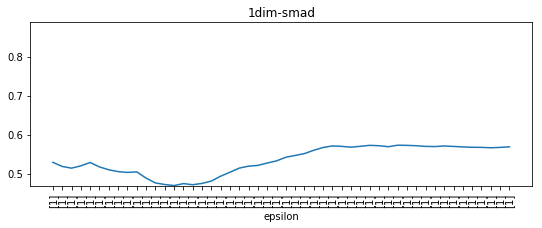

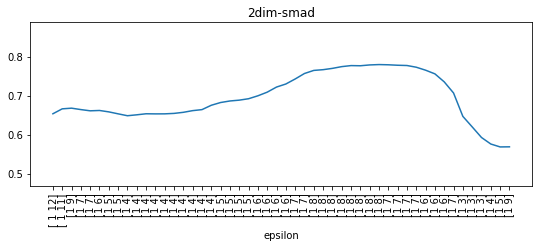

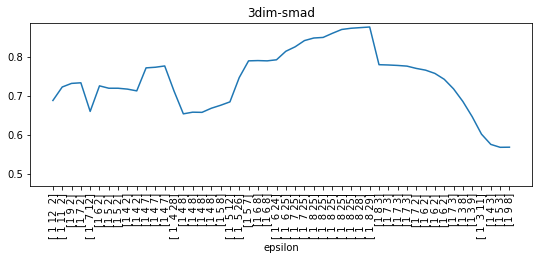

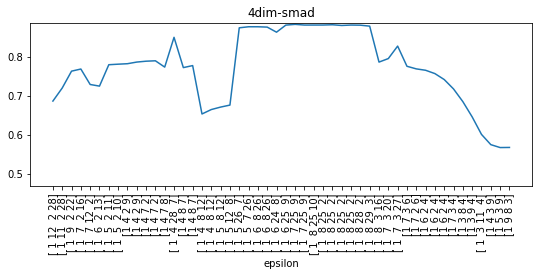

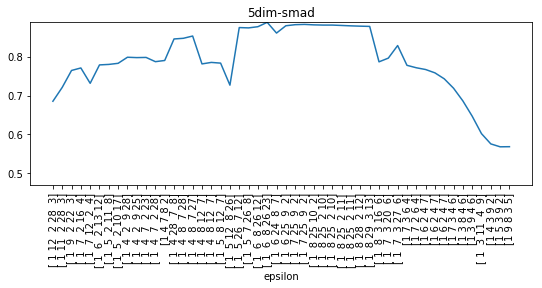

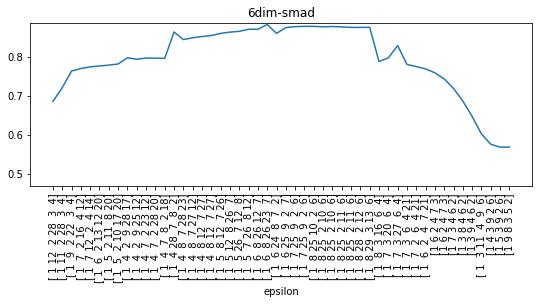

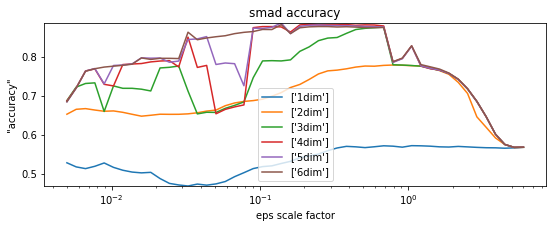

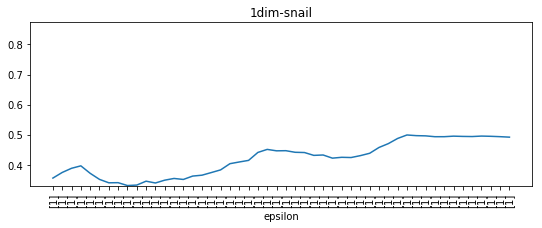

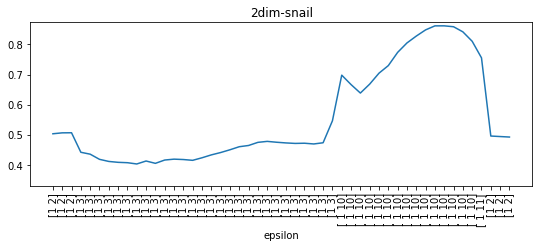

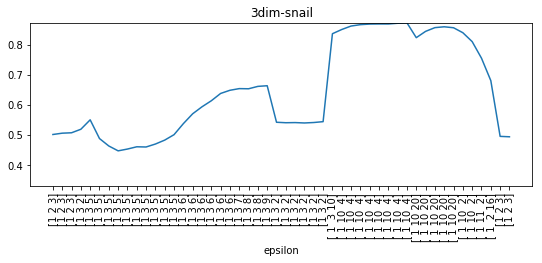

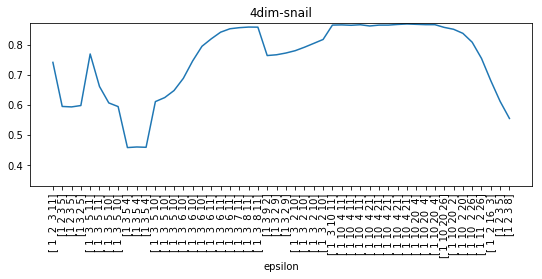

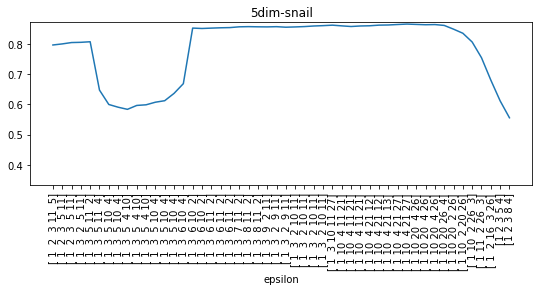

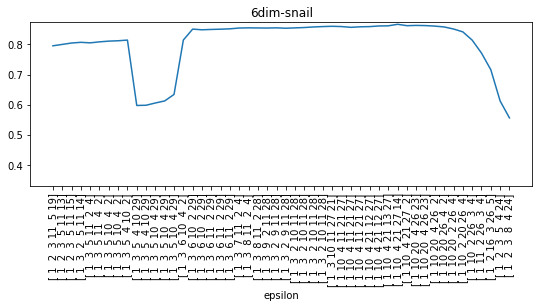

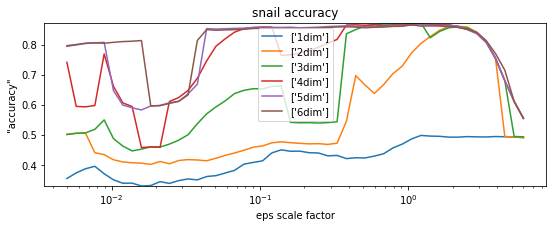

In [103]:
accy = accvali2
euse = ein.copy()
acclab = accstri2
smadsnail = 'smad'
plotaccmultidim5(accy,euse,acclab,ndims,smadsnail,epsfact)

accy = accvalo2
euse = eout.copy()
acclab = accstro2
smadsnail = 'snail'
plotaccmultidim5(accy,euse,acclab,ndims,smadsnail,epsfact)


In [104]:
maxiv = np.max(accvali2,axis=1)
maxii = np.argmax(accvali2,axis=1)
print(maxiv)
print(maxii)

maxov = np.max(accvalo2,axis=1)
maxoi = np.argmax(accvalo2,axis=1)
print(maxov)
print(maxoi)

[0.57281269 0.77982175 0.87721221 0.88463148 0.88790145 0.88345582]
[37 35 34 26 23 23]
[0.49905648 0.86180969 0.8730198  0.86965465 0.86730427 0.86692258]
[38 42 38 38 38 37]


In [105]:
xiii = np.where(maxiv>=(np.max(maxiv)*0.98))
print('xiii',xiii[0])

xoii = np.where(maxov>=(np.max(maxov)*0.98))
print('xoii',xoii[0])

xii = xiii[0]
xoi = xoii[0]

a = maxii[xii[0]]
ev_in0 = accstri2[int(xii[0])]
ev_in = ev_in0[a]

einsub = ein[a]
evecs_in = einsub[0]
evals_in = einsub[1]
eps_in = einsub[2]

b = maxoi[xoi[0]]
ev_out0 = accstro2[int(xoi[0])]
ev_out = ev_out0[b]

eoutsub = eout[b ]
evecs_out = eoutsub[0]
evals_out = eoutsub[1]
eps_out = eoutsub[2]

print('ev_in',ev_in)
print('ev_out',ev_out)
print('evecs_in',evecs_in.shape)
print('evals_in',evals_in.shape)
print('eps_in',eps_in.shape)
print('evecs_out',evecs_out.shape)
print('evals_out',evals_out.shape)
print('eps_out',eps_out.shape)

xiii [2 3 4 5]
xoii [1 2 3 4 5]
ev_in [ 1  8 29]
ev_out [ 1 10]
evecs_in (425, 30)
evals_in (30,)
eps_in (425,)
evecs_out (425, 30)
evals_out (30,)
eps_out (425,)


In [106]:
# from dmap_sp_chrisNEW import compute_residualsNEW
import dmap_sp_chrisNEW
import importlib
importlib.reload(dmap_sp_chrisNEW)

scalevec = np.logspace(np.log10(1.5),np.log10(6),3)
# scalevec=3

print('evecs_shape',evecs_in.shape)
print(eps_in.shape)
rrr = np.zeros(evecs_in.shape[1])
print(evecs_in.shape[1])
ressy1 = np.zeros((len(scalevec),evecs_in.shape[1]))
cycle=int(-1)
for i in scalevec:
    cycle=cycle+1
    rrr0 = compute_residualsNEW(evecs_in, eps_scale=i, progressBar=True, skipFirst=True, bandwidth_type='median')
    rrr = rrr0['Residuals']
    ressy1[int(cycle),0:(evecs_in.shape[1])]=rrr
    print(cycle,end=" ")
print('done')

print('evecs_shape',evecs_in.shape)
print(eps_in.shape)
rrr = np.zeros(evecs_in.shape[1])
print(evecs_in.shape[1])
# scalevec = np.logspace(np.log10(0.1),np.log10(10),11)
ressy2 = np.zeros((len(scalevec),evecs_in.shape[1]))
cycle=int(-1)
for i in scalevec:
    cycle=cycle+1
#     print(evecs_out.shape[1])
    rrr0 = compute_residualsNEW(evecs_out, eps_scale=i, progressBar=True, skipFirst=True, bandwidth_type='median')
    rrr = rrr0['Residuals']
    ressy2[int(cycle),0:(evecs_out.shape[1])]=rrr
    print(cycle,end=" ")
print('done')

evecs_shape (425, 30)
(425,)
30
0 1 2 done
evecs_shape (425, 30)
(425,)
30
0 1 2 done


[ 0  9  7  2 12  5 24 27 11 23 26 14  4 10 18 15  6  3 17 19 16 20 22 21
 25 13 28 29  8  1]
[ 0 16 12 23 17 27 18 24  9  7 14 26 15  5 11 19 21 20 28 25  2 10 22  4
  6 13  3 29  8  1]
[ 0 26 23 25 27 16 18 17 24 14 12  9 19 15 28 21 20 11 22  7  5 10  2 13
 29  4  6  3  8  1]


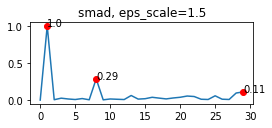

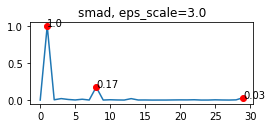

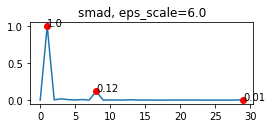

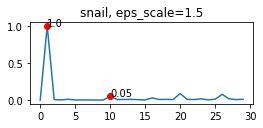

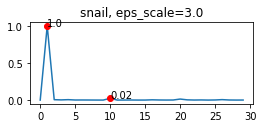

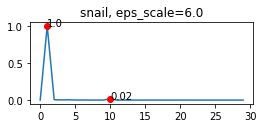

In [107]:
#eps_scale of 3 , cutoff of 0.05
#eps_scale of 6 is best when more n_evecs are considered
cycle=int(-1)
for i in scalevec:
    cycle=cycle+1
    rrr = ressy1[int(cycle),:]
    print(np.argsort(rrr))
    plt.figure(figsize=(4,1.5))
    plt.plot(rrr)
    plt.plot(ev_in,rrr[ev_in],'ro')
    plt.title('smad, eps_scale=' + str(np.round(i,2)))
    for h in range(len(ev_in)):
        tx= ev_in[h]
        ty = rrr[ev_in[h]]
        ts = str(np.round(ty,2))
        t = plt.text(tx,ty,ts)

plt.show()

    
cycle=int(-1)
for i in scalevec:
    cycle=cycle+1
    rrr = ressy2[int(cycle),:]
    plt.figure(figsize=(4,1.5))
    plt.plot(rrr)
    plt.plot(ev_out,rrr[ev_out],'ro')
    plt.title('snail, eps_scale=' + str(np.round(i,2)))
    for h in range(len(ev_out)):
        tx= ev_out[h]
        ty = rrr[ev_out[h]]
        ts = str(np.round(ty,2))
        t = plt.text(tx,ty,ts)

plt.show()

    

In [113]:
#save these as CSV files so you don't have to run it again and again

savepath = str(cwd) + '/' + csvsavepath
print(savepath)
if not os.path.exists(savepath):
    os.makedirs(savepath)

    

a = numpy.asarray(evecs_in)
numpy.savetxt(savepath+"evecs_in.csv", a, delimiter=",")
a = numpy.asarray(evals_in)
numpy.savetxt(savepath+"evals_in.csv", a, delimiter=",")
a = numpy.asarray(ev_in)
numpy.savetxt(savepath+"ev_in.csv", a, delimiter=",")


a = numpy.asarray(evecs_out)
numpy.savetxt(savepath+"evecs_out.csv", a, delimiter=",")
a = numpy.asarray(evals_out)
numpy.savetxt(savepath+"evals_out.csv", a, delimiter=",")
a = numpy.asarray(ev_out)
numpy.savetxt(savepath+"ev_out.csv", a, delimiter=",")

a = numpy.asarray(eps_in)
numpy.savetxt(savepath+"eps_in.csv", a, delimiter=",")
a = numpy.asarray(eps_in)
numpy.savetxt(savepath+"eps_out.csv", a, delimiter=",")

/Users/frick/Dparams/DParams_2017_04_17_v3/_dmap_csv_exp3tcutmed-LEV-tot-LEV-BC-tdelay_gpy/


In [114]:
#load the CSV files
savepath = str(cwd) + '/' + csvsavepath

evecs_in_csv = np.genfromtxt(savepath+"evecs_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
evecs_out_csv = np.genfromtxt(savepath+"evecs_out.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

evals_in_csv = np.genfromtxt(savepath+"evals_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
evals_out_csv = np.genfromtxt(savepath+"evals_out.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

eps_in_csv = np.genfromtxt(savepath+"eps_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
eps_out_csv = np.genfromtxt(savepath+"eps_out.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

ev_in_csv = np.genfromtxt(savepath+"ev_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
ev_out_csv = np.genfromtxt(savepath+"ev_out.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

In [115]:
evecs_in = evecs_in_csv
evecs_out = evecs_out_csv

evals_in = evals_in_csv
evals_out = evals_out_csv
ev_in = np.asarray(ev_in_csv,dtype='int')
ev_out = np.asarray(ev_out_csv,dtype='int')

eps_in = eps_in_csv
eps_out = eps_out_csv

In [112]:
# evecs_in = evecs_in*-1
evecs_in[:,ev_in[0]] = evecs_in[:,ev_in[0]]*-1
evecs_out[:,ev_out[1]] = evecs_out[:,ev_out[1]]*-1
# evecs_out = evecs_out*-1

(425, 30)
ev_in [ 1  8 29]
ev_out [ 1 10]
done


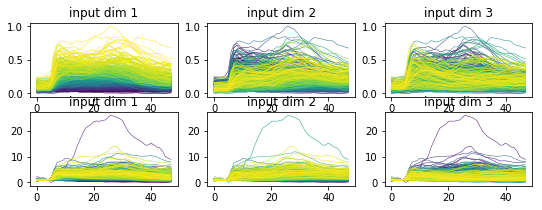

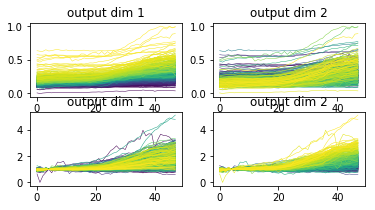

In [116]:
print(evecs_out.shape)
# ev_0=ev_in
# ev_out = [1,11]
# ev_in=[1,6,24]
# ev_out=[1,6]
# plot_trajectories_based_on_dparam(t0,in1,evecs_in,ev_in,'input')
# plot_trajectories_based_on_dparam(t0,out1,evecs_out,ev_out,'output')


# plt.plot(time_in.T,observed_data_in.T)    
# plt.show()
# plt.plot(time_out.T,observed_data_out.T)
# plt.show()
# plot_trajectories_based_on_dparam(time_in,in3,evecs_in,ev_in,'input')
print('ev_in',ev_in)
print('ev_out',ev_out)
plot_trajectories_based_on_dparam(time_data,observed_data_in,evecs_in,ev_in,'input')
plot_trajectories_based_on_dparam(time_data,observed_data_out,evecs_out,ev_out,'output')
# plot_trajectories_based_on_dparam(tvec,traj,evecs_0,ev_0,strstr):
print('done')
# evecs_out[]

In [156]:
def msefunc(xp,Y):
    mseeach={}
    Yscale = np.zeros(Y.shape)
    xpscale = np.zeros(Y.shape)
    for i in range(0,Y.shape[1]):
        Yscale[:,i] = (Y[:,i]-np.mean(Y[:,i]))/np.std(Y[:,i])
        xpscale[:,i] = (xp[:,i]-np.mean(xp[:,i]))/np.std(xp[:,i])
        mseeach[i]=np.mean((Yscale[:,i]-xpscale[:,i])**2)
    scalex = xpscale
    scaley = Yscale
    mse = np.mean((Yscale-xpscale)**2)
    return scalex,scaley, mse, mseeach

In [157]:
import GPy
#use Smad Manifold to predicut Smad trajectories (1 timepoint)

# sample inputs and outputs
X = evecs_in[:,ev_in]
Y = observed_data_in[:,10].reshape(-1,1) #reshape to look like a 2d input
print(Y.shape)
kerndim = X.shape[1]
ker = GPy.kern.Matern52(kerndim,ARD=True) + GPy.kern.White(kerndim)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# optimize and plot
m.optimize(messages=True,max_f_eval = 1000)

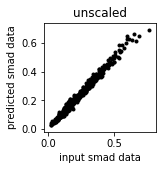

mse =  0.014056782302480864


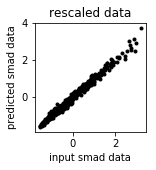

rescaled mse =  0.013862825301736366
{0: 0.013862825301736366}


In [164]:
#boom, we can predict input data well
xp,xstd = m.predict(X)
# print(xp)

x1 = Y
y1= xp

fig = plt.figure(figsize=(2,2))
plt.scatter(x1,y1,c='k',marker='.')
plt.xlabel('input smad data')
plt.ylabel('predicted smad data')
plt.title('unscaled')
plt.show()
#mse is deviation from identity
mse = np.mean(((x1/np.std(x1))-(y1/np.std(y1)))**2)
print('mse = ',mse.copy())

x1,y1, mse, mseeach = msefunc(xp,Y)


fig = plt.figure(figsize=(2,2))
plt.scatter(x1,y1,c='k',marker='.')
plt.xlabel('input smad data')
plt.ylabel('predicted smad data')
plt.title('rescaled data')
plt.show()
print('rescaled mse = ',mse)
print(mseeach.copy())


In [207]:
def Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr):
    kerndim = X.shape[1]
    ker = GPy.kern.Matern52(kerndim,ARD=True) + GPy.kern.White(kerndim)

    # create simple GP model
    m = GPy.models.GPRegression(X,Y,ker)

    # optimize and plot
    m.optimize(messages=messages,max_f_eval = max_f_eval)
    return m
    
def Gpy_mse_plot(m,X,Y,inputstr,outputstr):
    xp,xstd = m.predict(X)

    
    x1,y1, mse, mseeach = msefunc(xp,Y)
    for i in range(0,x1.shape[1]):
        fig = plt.figure(figsize=(2,2))
        plt.scatter(x1[:,i],y1[:,i],c='k',marker='.')
        plt.xlabel('orig.' + outputstr)
        plt.ylabel('pred.' + outputstr)
        plt.title('predict ' + outputstr + ' based on ' + inputstr + ', rescaled')
        plt.show()
        print('rescaled mse = ',mse)
        print(mseeach.values())

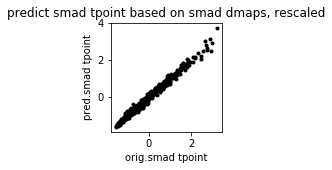

rescaled mse =  0.013862825301736366
dict_values([0.013862825301736366])


In [208]:
import GPy
#use Smad Manifold to predicut Smad trajectories (1 timepoint)
# sample inputs and outputs
inputstr = 'smad dmaps'
outputstr = 'smad tpoint'
X = evecs_in[:,ev_in]
Y = observed_data_in[:,10].reshape(-1,1) #reshape to look like a 2d input

max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
Gpy_mse_plot(m,X,Y,inputstr,outputstr)

[-27.34       -21.40829787 -15.47659574  -9.54489362  -3.61319149]


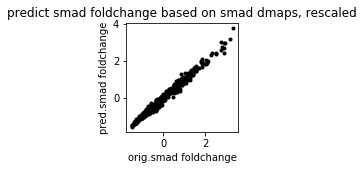

rescaled mse =  0.016281659093463248
dict_values([0.016281659093463248])


In [209]:

#use Smad Manifold to predicut Smad trajectories (fold change at 1 timepoint)
inputstr = 'smad dmaps'
outputstr = 'smad foldchange'
tvec = time_data[1,:]
basal = ((np.where(tvec<=0))[0])
peak = ((np.where(tvec<=30))[0])[-1]
print(tvec[basal])
foldchange = observed_data_in[:,peak]/np.median(observed_data_in[:,basal])

X = evecs_in[:,ev_in]
Y = foldchange.reshape(-1,1) #reshape to look like a 2d input

max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
Gpy_mse_plot(m,X,Y,inputstr,outputstr)

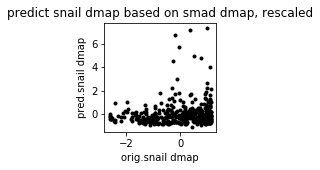

rescaled mse =  1.4655658562578469
dict_values([1.7571281059204833, 1.1740036065952106])


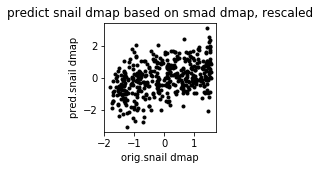

rescaled mse =  1.4655658562578469
dict_values([1.7571281059204833, 1.1740036065952106])


In [210]:
#attempt to predict output DMAP using input Dmaps
# sample inputs and outputs
X = evecs_in[:,ev_in]
Y = evecs_out[:,ev_out]


inputstr = 'smad dmap'
outputstr = 'snail dmap'

max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
Gpy_mse_plot(m,X,Y,inputstr,outputstr)


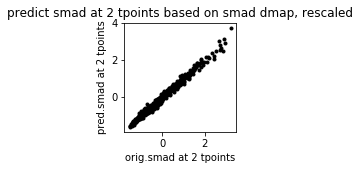

rescaled mse =  0.015225583544154538
dict_values([0.013247499576299572, 0.017203667512009507])


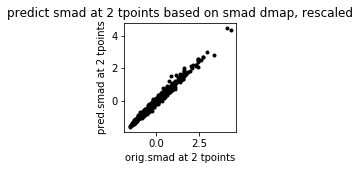

rescaled mse =  0.015225583544154538
dict_values([0.013247499576299572, 0.017203667512009507])


In [211]:
#attempt to predict input data at two timepoints using Smad Dmaps
import GPy

# sample inputs and outputs
X = evecs_in[:,ev_in]
Y = observed_data_in[:,[10,20]]


inputstr = 'smad dmap'
outputstr = 'smad at 2 tpoints'

max_f_eval = 1000
messages=False
m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)
Gpy_mse_plot(m,X,Y,inputstr,outputstr)

In [ ]:
def Gpy_eachtpoint(X,Y,messages,max_f_eval,inputstr,outputstr):
    msearray = np.zeros(Yin.shape[1])
    for j in range(0,Yin.shape[1]):
        Y = Yin[:,j].reshape(-1,1)

        max_f_eval = 1000
        messages=False
        m = Gpymadness(X,Y,messages,max_f_eval,inputstr,outputstr)

        xp,xstd = m.predict(X)
        x = Y
        y = xp
        x1,y1, mse, mseeach = msefunc(xp,Y)
        msearray[j]=mse
        print(j, end=" " )
    return msearray


In [212]:
#attempt to predict input data at all timepoints using Smad Dmaps

inputstr = 'smad dmap'
outputstr = 'smad at each tpoint'
max_f_eval = 1000
messages=False

X = evecs_in[:,ev_in]
Yin = observed_data_in
msearray = Gpy_eachtpoint(X,Y,messages,max_f_eval,inputstr,outputstr)


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 

0.009286652981829027
(425, 48)


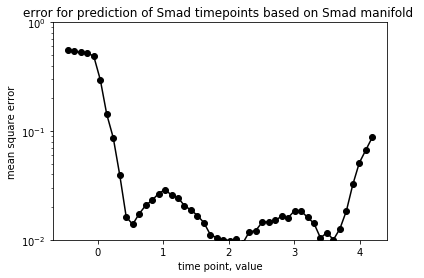

In [176]:
print(np.min(msearray[:]))
print(time_data.shape)
tvec = time_data[1,:]/60
plt.semilogy(tvec,msearray,'k-o')
plt.ylim(0.01,1)
plt.ylabel('mean square error')
plt.xlabel('time point, value')
plt.title('error for prediction of Smad timepoints based on Smad manifold ')
plt.show()


In [244]:
#attempt to predict output data trajectories using Smad Dmaps
import GPy

# sample inputs and outputs
X = evecs_in[:,ev_in]

msearrayout = np.zeros(observed_data_in.shape[1])
for j in range(0,observed_data_in.shape[1]):
    Y = observed_data_out[:,j].reshape(-1,1)

    # define kernel
    ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

    # create simple GP model
    m = GPy.models.GPRegression(X,Y,ker)

    # optimize and plot
    m.optimize(messages=False,max_f_eval = 1000)


    xp,xstd = m.predict(X)
    x = Y
    y = xp

    #you need to do this for each axis individually
    Yscale=Y.copy()
    xpscale=xp.copy()
    for i in range(0,Y.shape[1]):
        Yscale[:,i] = (Y[:,i]-np.mean(Y[:,i]))/np.std(Y[:,i])
        xpscale[:,i] = (xp[:,i]-np.mean(xp[:,i]))/np.std(xp[:,i])

    mse = np.mean((Yscale-xpscale)**2)

    msearrayout[j]=mse
#     print(mse)
    print(j, end=" " )

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 

In [245]:
#attempt to predict a known function of input data using Smad Dmaps
import GPy

# sample inputs and outputs
X = evecs_in[:,ev_in]

Z = observed_data_out.copy()
mu, sigma = 0, 0.05 # mean and standard deviation


for j in range(0,observed_data_in.shape[1]):
    s = np.random.normal(mu, sigma, observed_data_in.shape[0])
    Z[:,j] = (observed_data_in[:,j]**2) + s
 


msearrayZ = np.zeros(observed_data_in.shape[1])
for j in range(0,observed_data_in.shape[1]):
    Y = Z[:,j].reshape(-1,1)

    # define kernel
    ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

    # create simple GP model
    m = GPy.models.GPRegression(X,Y,ker)

    # optimize and plot
    m.optimize(messages=False,max_f_eval = 1000)


    xp,xstd = m.predict(X)
    x = Y
    y = xp

    #you need to do this for each axis individually
    Yscale=Y.copy()
    xpscale=xp.copy()
    for i in range(0,Y.shape[1]):
        Yscale[:,i] = (Y[:,i]-np.mean(Y[:,i]))/np.std(Y[:,i])
        xpscale[:,i] = (xp[:,i]-np.mean(xp[:,i]))/np.std(xp[:,i])

    mse = np.mean((Yscale-xpscale)**2)

    msearrayZ[j]=mse
#     print(mse)
    print(j, end=" " )

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 

In [246]:
#attempt to predict a known function of input data using Smad Dmaps
import GPy

# sample inputs and outputs
X = evecs_in[:,ev_in]

Z = observed_data_out.copy()
mu, sigma = 0, 1 # mean and standard deviation


for j in range(0,observed_data_in.shape[1]):
    s = np.random.normal(mu, sigma, observed_data_in.shape[0])
    Z[:,j] = s
 


msearrayNoise = np.zeros(observed_data_in.shape[1])
for j in range(0,observed_data_in.shape[1]):
    Y = Z[:,j].reshape(-1,1)

    # define kernel
    ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

    # create simple GP model
    m = GPy.models.GPRegression(X,Y,ker)

    # optimize and plot
    m.optimize(messages=False,max_f_eval = 1000)


    xp,xstd = m.predict(X)
    x = Y
    y = xp

    #you need to do this for each axis individually
    Yscale=Y.copy()
    xpscale=xp.copy()
    for i in range(0,Y.shape[1]):
        Yscale[:,i] = (Y[:,i]-np.mean(Y[:,i]))/np.std(Y[:,i])
        xpscale[:,i] = (xp[:,i]-np.mean(xp[:,i]))/np.std(xp[:,i])

    mse = np.mean((Yscale-xpscale)**2)

    msearrayNoise[j]=mse
#     print(mse)
    print(j, end=" " )

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 

 /Users/frick/anaconda/lib/python3.6/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/frick/anaconda/lib/python3.6/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /Users/frick/anaconda/lib/python3.6/site-packages/GPy/kern/src/stationary.py:551: RuntimeWarning:invalid value encountered in multiply


22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 

1.2659736249929225
(425, 48)


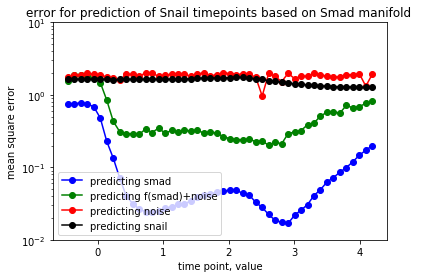

In [119]:
print(np.min(msearrayout[:]))
print(time_data.shape)
tvec = time_data[1,:]/60
plt.semilogy(tvec,msearray,'b-o')
plt.semilogy(tvec,msearrayZ,'g-o')
plt.semilogy(tvec,msearrayNoise,'r-o')
plt.semilogy(tvec,msearrayout,'k-o')
plt.ylim(0.01,10)
plt.legend(['predicting smad','predicting f(smad)+noise','predicting noise','predicting snail'])
plt.ylabel('mean square error')
plt.xlabel('time point, value')
plt.title('error for prediction of Snail timepoints based on Smad manifold ')
plt.show()


1.2659736249929225
(425, 48)


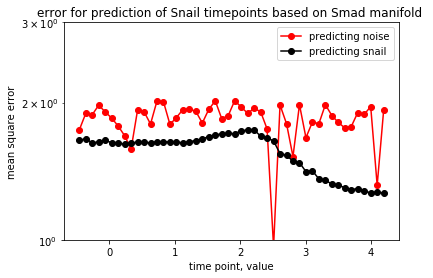

In [123]:
print(np.min(msearrayout[:]))
print(time_data.shape)
tvec = time_data[1,:]/60
plt.semilogy(tvec,msearrayNoise,'r-o')
plt.semilogy(tvec,msearrayout,'k-o')
plt.ylim(1,3)
plt.legend(['predicting noise','predicting snail'])
plt.ylabel('mean square error')
plt.xlabel('time point, value')
plt.title('error for prediction of Snail timepoints based on Smad manifold ')
plt.show()


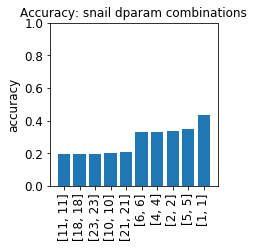

0.43314917455052004


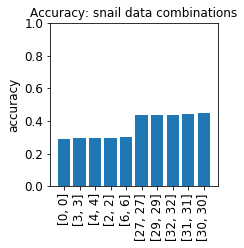

0.44996943746652784


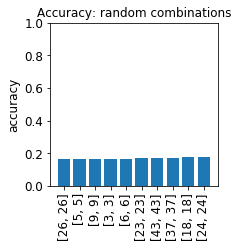

0.17518640950918413


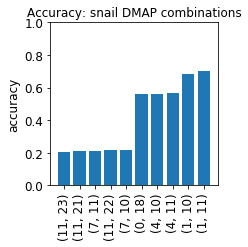

0.7037175099500944


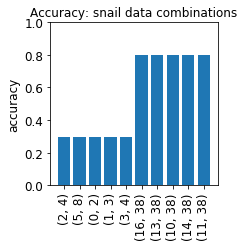

0.8014522984463


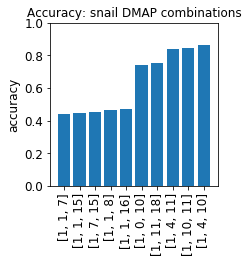

0.8625396580633113


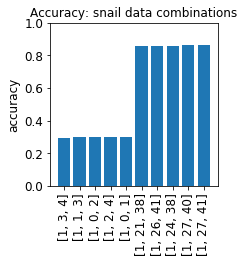

0.861649641051322


In [56]:
k=5
ev_i = [0,1]
seedval =16
smadsnail = 'snail'
datatest = observed_data_out

#1d accuracy
# evecs_test = shaver(evecs_out,evals_out,eps_out)
# lcout1n, kout1n, krndout1n, koutbest1n = accbar1(k,datatest,evecs_test,smadsnail)
# evecs_test = observed_data_out
# lcout1d, kout1d, krndout1d, koutbest1d = accbar1(k,datatest,evecs_test,smadsnail)
# evecs_test = numpy.random.random((observed_data_out.shape))
# lcout1nr, kout1nr, krndout1nr, koutbest1nr = accbar1(k,datatest,evecs_test,smadsnail)

accbar1plot(kout1n,koutbest1n,krndout1n,lcout1n,'snail dparam')
accbar1plot(kout1d,koutbest1d,krndout1d,lcout1d,'snail data')
accbar1plot(kout1nr,koutbest1nr,krndout1nr,lcout1nr,'random')


#2d accuracy
# evecs_test = shaver(evecs_out,evals_out,eps_out)
# lcout2, kout2, krndout2, koutbest2 = accbar2(k,datatest,evecs_test,smadsnail)
# evecs_test = observed_data_out
# lcout2d, kout2d, krndout2d, koutbest2d = accbar2(k,datatest,evecs_test,smadsnail)

accbar2plot(kout2,koutbest2,krndout2,lcout2,'snail DMAP')
accbar2plot(kout2d,koutbest2d,krndout2d,lcout2d,'snail data')

#3d accuracy
# evecs_test = shaver(evecs_out,evals_out,eps_out)
# lcout3, kout3, krndout3, koutbest3 = accbar3_21(k,datatest,evecs_test,smadsnail)
# evecs_test = observed_data_out
# lcout3d, kout3d, krndout3d, koutbest3d = accbar3_21(k,datatest,evecs_test,smadsnail)

accbar2plot(kout3,koutbest3,krndout3,lcout3,'snail DMAP')
accbar2plot(kout3d,koutbest3d,krndout3d,lcout3d,'snail data')


In [41]:
cparray=[50,300,450] #or 79

110

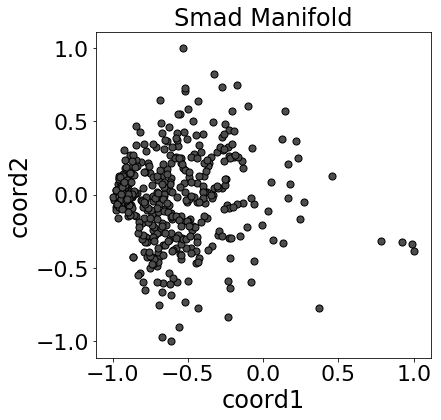

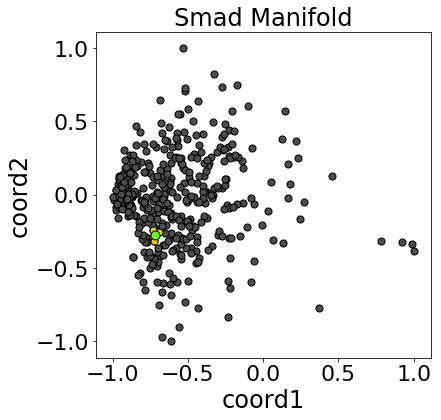

111

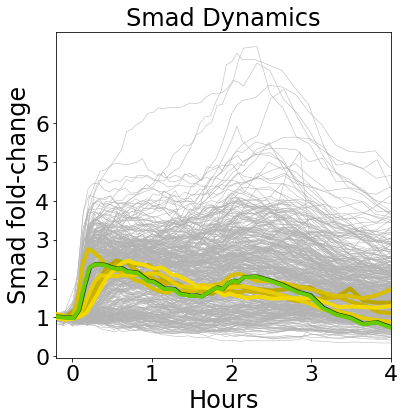

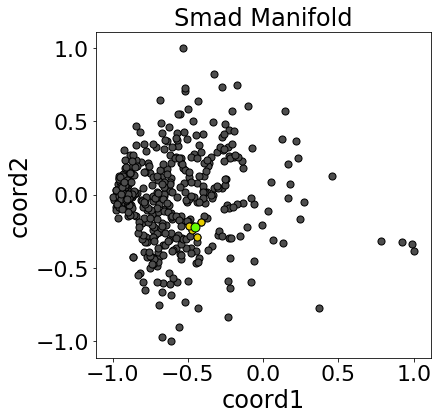

112

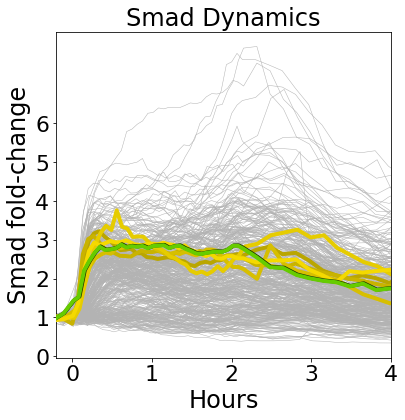

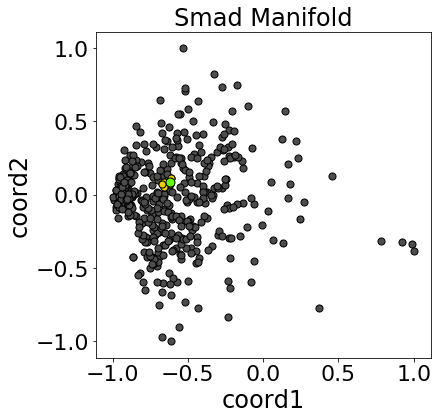

110

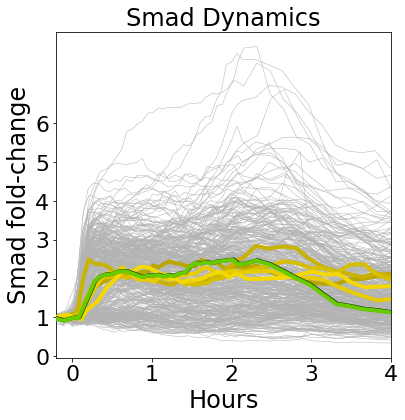

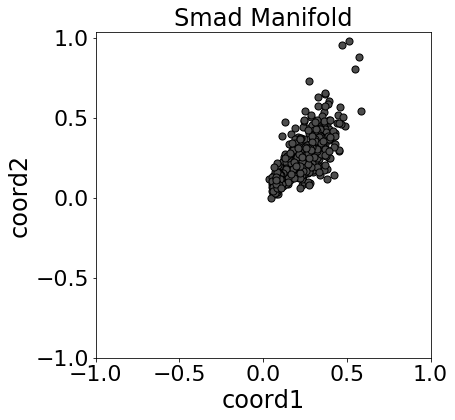

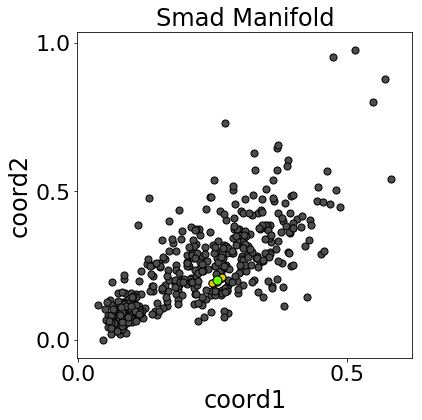

111

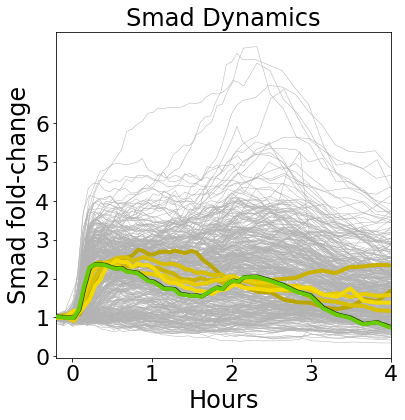

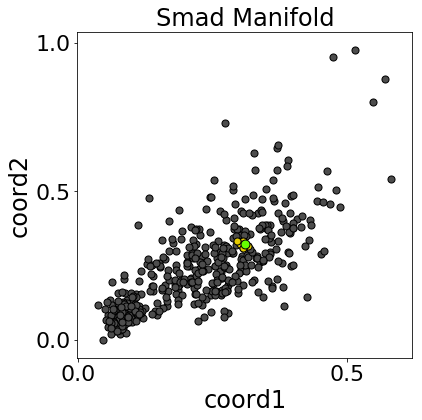

112

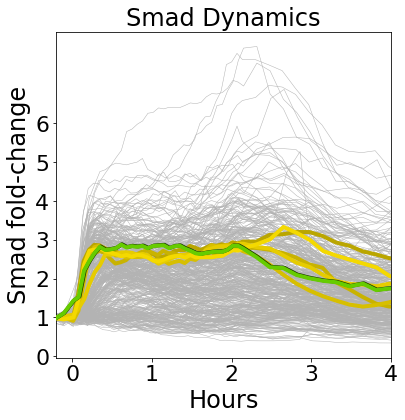

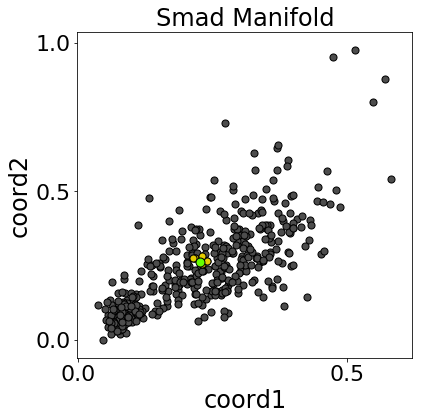

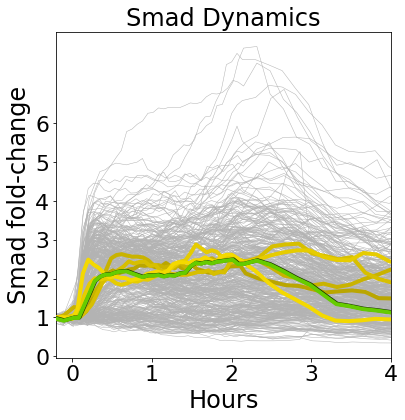

In [42]:
#FIGURE PLOTTER MADNESS (SNAIL)
#validate accuracy (test2), using evecs only in 3d
import os
import matplotlib.cm as cm

savepath = str(cwd) + '/lottafigs'+conditionid+cond2+'/'
if not os.path.exists(savepath):
    os.makedirs(savepath)
    
def DPARAMplotter6(ev_in,evecs_in,k,ploton,testvec,smadsnail,seedval):

    ev_test = [ev_in[x] for x in testvec]
    cellindex = range(ogdin.shape[0])
    xyz=evecs_in[:,ev_test]


    import sklearn.metrics as sm
    dist = sm.pairwise_distances(xyz,metric = 'euclidean')
    arg_dist = np.argsort(dist)
    closest = arg_dist[:,1:k+1]


    if smadsnail == 'Smad':
        smad = ogddin.T
        snail = ogddout.T
        timex = timedin.T
        responsename = 'fold-change'
#         ylim = [0,6]
        yticks = [0,1,2,3,4,5,6]
    elif smadsnail == 'Snail':
        smad = ogddout.T
        timex = timedout.T
        responsename = 'expression'
#         ylim = [-800,2200]
        yticks = [-500,0,500,1000,1500,2000,2500,3000]

    if ploton=='on':
#         fig = plt.figure(figsize=(4,4))
#         ax = plt.add_subplot(1,)
        numpoints = k
        colors = matplotlib.cm.rainbow(np.linspace(0, 1, numpoints))
        fig = plt.figure(figsize=(6,6))
        x = xyz[:,0]
        y = xyz[:,1]
        dxy = sm.pairwise_distances(x.reshape(1,-1),y.reshape(1,-1),metric = 'euclidean')
        if dxy<0.001:
            yarg = np.argsort(y)
            ysort= y[yarg]
            y = ysort
            x = np.linspace(0,len(yarg)-1,len(yarg))
            
        plt.scatter(x,y,color=[0.3, 0.3, 0.3],s=50,edgecolor='k',zorder=0,cmap=cm.magma)


        fontsize = 24
        plt.xlabel('coord1',fontsize=fontsize)
        plt.ylabel('coord2',fontsize=fontsize)
        plt.xticks([-1,-0.5,0,0.5,1],fontsize=fontsize-2)
        plt.yticks([-1,-0.5,0,0.5,1],fontsize=fontsize-2)
        if dxy<0.001:
            plt.ylabel('coord1',fontsize=fontsize)
            plt.xlabel('index',fontsize=fontsize)
            plt.xticks(np.linspace(np.min(x),np.max(x),2))
            

        plt.title(smadsnail+ ' Manifold',fontsize=fontsize)
        plt.savefig('all'+smadsnail+'.png', bbox_inches='tight')
#         plt.axes
        savestr = savepath+'plain'+smadsnail+'.png'
        plt.savefig(savestr,bbox_inches='tight')
        
#         for cp1 in range(1):
#         for cp1 in range(closest.shape[0]):
                # [1,118,157]: keep 40, 70
#                 [180,70,150]:
        for cp1 in [110,111,112]:
            print(cp1,end="")
            nbs1 = closest[cp1,0:k]
            numpoints=k

            nbsarray = [nbs1]
            cparray = [cp1]

            if len(ev_test)==2:
                for i in range(len(nbsarray)):
                    nbs = nbsarray[i]
                    cp = cparray[i]
                    fig = plt.figure(figsize=(6,6))
                    ax = fig.add_subplot(111)
                    x = xyz[:,0]
                    y = xyz[:,1]
                    if dxy<0.001:
                        yarg = np.argsort(y)
                        ysort= y[yarg]
                        y = ysort
                        x = np.linspace(0,len(yarg)-1,len(yarg))



                    plt.scatter(x,y,color=[0.3, 0.3, 0.3],s=50,edgecolor='k',zorder=0,cmap=cm.magma)
                    if dxy<0.001:
                            cp = np.where(yarg==cp)
                    plt.scatter(x[cp],y[cp],color=[0.4, 1, 0],s=80,edgecolor=[0, 0, 0],zorder=10,alpha=1)
                    plt.xlabel('coord1',fontsize=fontsize)
                    plt.ylabel('coord2',fontsize=fontsize)
                    
                        
                    plt.xticks([-1,-0.5,0,0.5,1],fontsize=fontsize-2)
                    plt.yticks([-1,-0.5,0,0.5,1],fontsize=fontsize-2)
                    if dxy<0.001:
                        plt.ylabel('coord1',fontsize=fontsize)
                        plt.xlabel('index',fontsize=fontsize)
                        plt.xticks(np.linspace(np.min(x),np.max(x),2))
                    plt.title(smadsnail + ' Manifold',fontsize=fontsize)
                    savestr = savepath+'chosenonly'+str(cp1)+smadsnail+'.png'
                    plt.savefig(savestr,bbox_inches='tight')
                    for j in range(0,numpoints):
                        xx = nbs[j]
                        if dxy<0.001:
                            xx = np.where(yarg==xx)
                        plt.scatter(x[xx],y[xx],color=[0.9, 0.8, 0],s=50,edgecolor='k',zorder=5,alpha=1)

                    savestr = savepath+'chosenAnd'+str(cp1)+smadsnail+'.png'
                    plt.savefig(savestr,bbox_inches='tight')
                    plt.show()
                    
                    lw=4
                    fig = plt.figure(figsize=(6,6))
                    ax = fig.add_subplot(111)
#                     ax = fig.add_subplot(122)
#                     x = np.transpose(t0[:,19:49])/60
                    x = timex/60
                    y = smad
                    plt.plot(x,y,color=[0.7,0.7,0.7],zorder=-5,linewidth=0.5)
                    fontsize = 24
                    plt.xlabel('Hours',fontsize=fontsize)
                    plt.ylabel( smadsnail+ ' ' +responsename,fontsize=fontsize)
                    plt.xticks([-1,0,1,2,3,4],fontsize=fontsize-2)
                    plt.yticks(yticks,fontsize=fontsize-2)
                    plt.title(smadsnail + ' Dynamics',fontsize=fontsize)
                    plt.xlim(-0.2,4)
#                     plt.ylim(ylim)
                    savestr = savepath+'all'+str(cp1+1)+smadsnail+'traj.png'
                
                    plt.savefig(savestr,bbox_inches='tight')
                    
                    #plot chosen cell
                    cv1 = [0.4, 0.8, 0]
                    cv1 = np.asarray(cv1)
                    cval = cv1/4
                    xvec = x[:,cp1]
                    yvec = y[:,cp1]
                    plt.plot(xvec.flatten()+0.01,yvec.flatten()+0.01,color=cval,linewidth=lw,zorder=9)
                    plt.plot(xvec.flatten(),yvec.flatten(),color=[0.4, 0.8, 0],linewidth=lw,zorder=10)
                    savestr = savepath+'chosenonly'+str(cp1)+smadsnail+'traj.png'
                    plt.savefig(savestr,bbox_inches='tight')
                    
                    for j in range(0,numpoints):
                        xx = nbs[j]
                        cv1 = [0.9, 0.8, 0]
                        cv1 = np.asarray(cv1)
                        cval = (cv1*((j+3)+10)/16)
                        plt.plot(x[:,xx],y[:,xx],color=cval,linewidth=lw,zorder=5)
                    savestr = savepath+'chosenAND'+str(cp1)+smadsnail+'traj.png'
                    plt.savefig(savestr,bbox_inches='tight')
                    

        
#         if ploton=='on':
#             fig = plt.figure(figsize=(12,3))
#             plt.subplots_adjust(wspace=0.5)
# #             ax = plt.add_subplot(1,)
#             colors = matplotlib.cm.rainbow(np.linspace(0, 1, numpoints))
#             if testvec[0]==testvec[1]:
#                 for i in range(len(nbsarray)):
#                     nbs = nbsarray[i]
#                     cp = cparray[i]
#                     x = xyz[:,0]
#                     y = xyz[:,1]
#                     dxy = sm.pairwise_distances(x.reshape(1,-1),y.reshape(1,-1),metric = 'euclidean')
#                     if dxy<0.001:
#                         yarg = np.argsort(y)
#                         ysort= y[yarg]
#                         y = ysort
#                         x = np.linspace(0,len(yarg)-1,len(yarg))
# #                         x = x[yarg]

#                     plt.scatter(x,y,color=[0.6, 0.6, 0.6],s=5,edgecolor='k',zorder=0)
#                     if dxy<0.001:
#                             cp = np.where(yarg==cp)
#                     plt.scatter(x[cp],y[cp],color=[0, 1, 0],s=200,edgecolor=[0, 0, 0],zorder=5,alpha=1)
#                     for i in range(0,numpoints):
#                         xx = nbs[i]
#                         if dxy<0.001:
#                             xx = np.where(yarg==xx)


#                         plt.scatter(x[xx],y[xx],color=[1, 1, 0],s=50,edgecolor='k',zorder=10,alpha=1)
#                         plt.set_ylabel(smadsnail + ' dim1')
#                         plt.set_ylabel(smadsnail + ' dim2')
#                         if dxy<0.001:
#                             plt.set_ylabel(smadsnail + ' dim1')
#                             plt.set_xlabel('index')


  
            
seedval=120
smadsnail='snail'
shave = shaver(evecs_in,evals_in,eps_in)
# shave = evecs_in
k=5

# ev_in=[1,4]
testvec=[0,1]
DPARAMplotter6(ev_in,evecs_in,k,'on',testvec,'Smad',seedval)

testvec=[0,1]
DPARAMplotter6([9,34],observed_data_in,k,'on',testvec,'Smad',seedval)

# testvec=[0,0]
# DPARAMplotter6(ev_out,evecs_out,k,'on',testvec,'Snail',seedval)

# smadsnail='snail'
# testvec=[0,1]
# DPARAMplotter5(ev_out,evecs_out,k,'on',testvec,smadsnail,seedval)

# savefig(fname, dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)

In [46]:
print(ev_in)

[1 7]


In [47]:
print(ev_out)

[1 6]


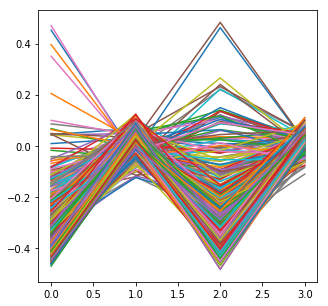

In [35]:

# get input-output data dmaps
# print(data.shape)

data_type = "compute dmatrix"
n_evecs = 25
LB_flag = 1

if 1==0:
    epsilon = 5e-1
    estimate_eps = False
    # use complete trajectory data for the combined manifold
    data = np.hstack([observed_data_in, observed_data_out])
else:
    epsilon = 1
    estimate_eps = True
    # use DMAP coordinates of input and DMAP coordinates of output combined
    
    factor_in = np.median(eps_in)/4
    factor_out = np.median(eps_out)/4
    datainout = np.vstack([(evals_in[ev_in[0]]**factor_in)*evecs_in[:,ev_in[0]],
                           (evals_in[ev_in[1]]**factor_in)*evecs_in[:,ev_in[1]],
                           (evals_out[ev_out[0]]**factor_out)*evecs_out[:,ev_out[0]]/epsilon,
                           (evals_out[ev_out[1]]**factor_out)*evecs_out[:,ev_out[1]]/epsilon]).T
    
#     factor_in = np.median(eps_in)/4
#     factor_out = np.median(eps_out)/4
#     datainout = np.vstack([evecs_in[:,ev_in[0]],
#                       evecs_out[:,ev_out[0]]/epsilon]).T
#                     #rescale the last one by setting factor_out=0 
   


# datinout = zero_one_population(datainout)

fig = plt.figure(figsize=(5,5))
plt.plot(datainout.T)
plt.show()




initializing diffusion map computation, data is a 425X4 matrix.
estimated epsilon: 0.1586722001716974
density median 0.8912937833273615
density min 0.3782369144605619
density max 0.9279912445246072
epsilon 0.17802457858434204
sparsity: 0.9976
starting diffusion map computation.
using LB approximation
using eigsh to find 25 eigenvectors
computed eigensystem in 0 seconds.
working on input_output
0.02
good input_output dparams are: [ 1  7  2 15]


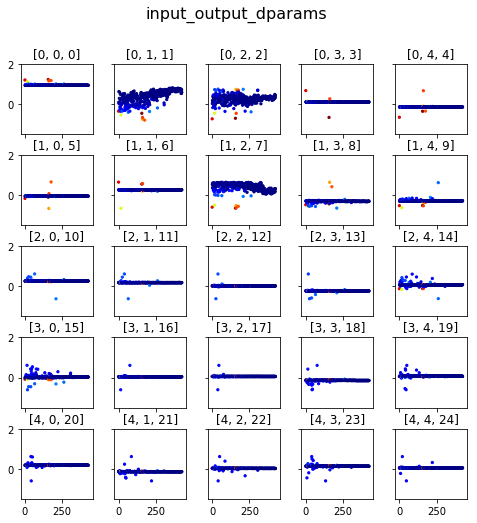

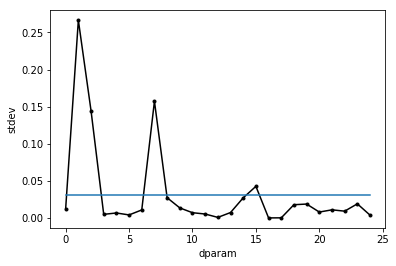

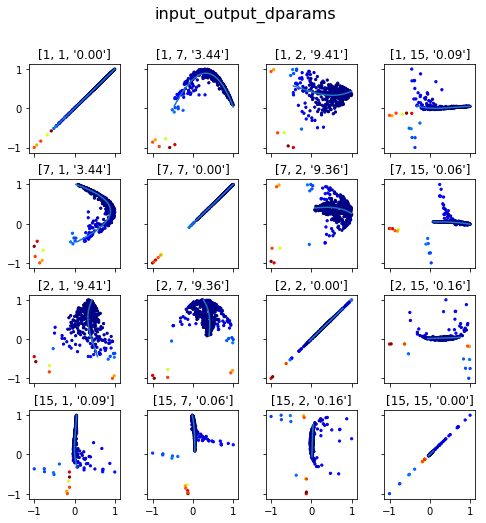

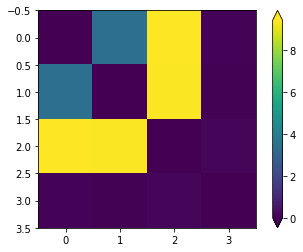

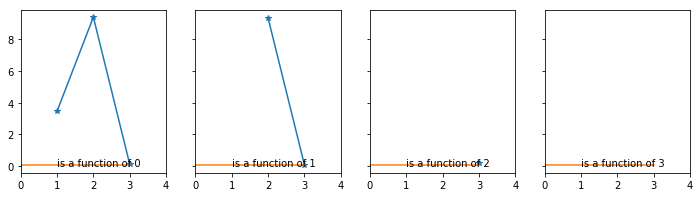

In [36]:
n_evecs = 25
LB_flag = 1
epsilon = 3
state_dependent_eps = True
cutoff_num=-1
estimate_eps = True
data_type = "compute dmatrix"

evecs_combined,evals_combined,_,_,_,eps_combined = dmap_sp(datainout,epsilon,
                                    n_evecs,LB_flag,data_type,
                                    estimate_eps=estimate_eps,
                                    cutoff_num=cutoff_num,
                                    state_dependent_eps=state_dependent_eps,verbose=True)

stdcut = 10
taurcut = 0.02

goodinputoutput = autodparam(evecs_combined,evals_combined,eps_combined,'input_output')

#choose important eigenvectors
ev_inout = goodinputoutput.astype(int).copy() # important eigenvectors for input, determined visually from previous plots

In [37]:
#save these as CSV files so you don't have to run it again and again

savepath = str(cwd) + '/' + csvsavepath
print(savepath)
if not os.path.exists(savepath):
    os.makedirs(savepath)

    

a = numpy.asarray(evecs_combined)
numpy.savetxt(savepath+"evecs_combined.csv", a, delimiter=",")
a = numpy.asarray(evals_combined)
numpy.savetxt(savepath+"evals_combined.csv", a, delimiter=",")
a = numpy.asarray(ev_inout)
numpy.savetxt(savepath+"ev_inout.csv", a, delimiter=",")


a = numpy.asarray(eps_combined)
numpy.savetxt(savepath+"eps_combined.csv", a, delimiter=",")

/Users/frick/Dparams/DParams_2017_04_17_v3/_dmap_csv_exp3tcutmedFC-totDIFF-BC-tdelay_gpy/


In [38]:
#load the CSV files
savepath = str(cwd) + '/' + csvsavepath

evecs_combined_csv = np.genfromtxt(savepath+"evecs_combined.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
evals_combined_csv = np.genfromtxt(savepath+"evals_combined.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
eps_combined_csv = np.genfromtxt(savepath+"eps_combined.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
ev_inout_csv = np.genfromtxt(savepath+"ev_inout.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

In [58]:
evecs_combined = evecs_combined_csv

evals_combined = evals_combined_csv
ev_inout = np.asarray(ev_inout_csv,dtype='int')
eps_combined = eps_combined_csv


In [59]:
print(ev_inout)

[ 1  7  2 15]


In [44]:
ev_inout = [1,4]
ev_inout = [1]
ev_inout = [1,3]

6


AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

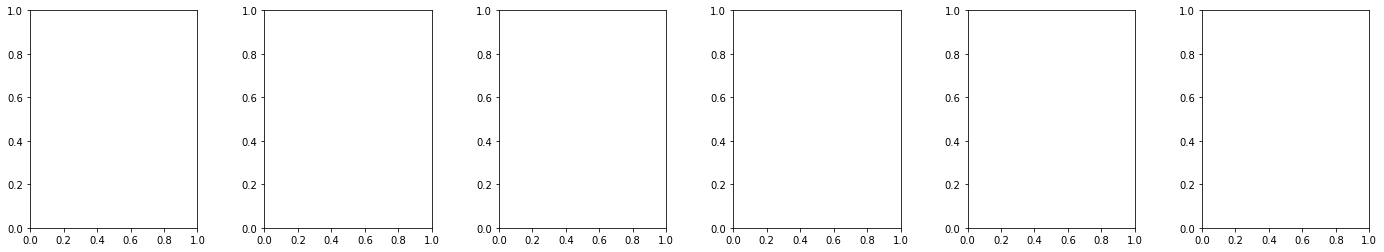

In [60]:
from itertools import combinations 
comb = combinations(range(len(ev_inout)),2)
listcomb = list(comb)
print(len(listcomb))
fig,ax = plt.subplots(1,len(listcomb),figsize=(4*len(listcomb),4),sharey=False)
plt.subplots_adjust(wspace=0.4)
cc3 = dosage_data
for i in range(len(listcomb)):
    lci=listcomb[i]
    ax.scatter(evecs_combined[:,ev_inout[lci[0]]],evecs_combined[:,ev_inout[lci[1]]],c=dosage_data,edgecolor=[0,0,0])
    ax.set_xlabel('in_out dim%d' % (lci[0]+1))
    ax.set_ylabel('in_out dim%d' % (lci[1]+1))
    


6


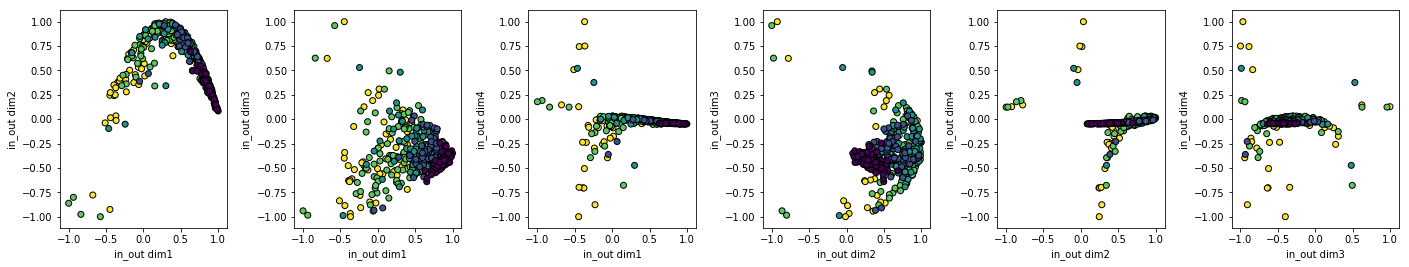

In [61]:
# ev_inout = [1,2,6]
comb = combinations(range(len(ev_inout)),2)
listcomb = list(comb)
print(len(listcomb))
fig,ax = plt.subplots(1,len(listcomb),figsize=(4*len(listcomb),4),sharey=False)
plt.subplots_adjust(wspace=0.4)
cc3 = dosage_data
for i in range(len(listcomb)):
    lci=listcomb[i]
    ax[i].scatter(evecs_combined[:,ev_inout[lci[0]]],evecs_combined[:,ev_inout[lci[1]]],c=dosage_data,edgecolor=[0,0,0])
    ax[i].set_xlabel('in_out dim%d' % (lci[0]+1))
    ax[i].set_ylabel('in_out dim%d' % (lci[1]+1))
    


In [62]:
print(datainout.shape)
datainout[1,:]
evecs_combined[:,ev_inout[2]] = evecs_combined[:,ev_inout[2]]*-1
# evecs_combined[:,ev_inout[0]] = evecs_combined[:,ev_inout[0]]*-1

(425, 4)


[ 1  7  2 15]
0123

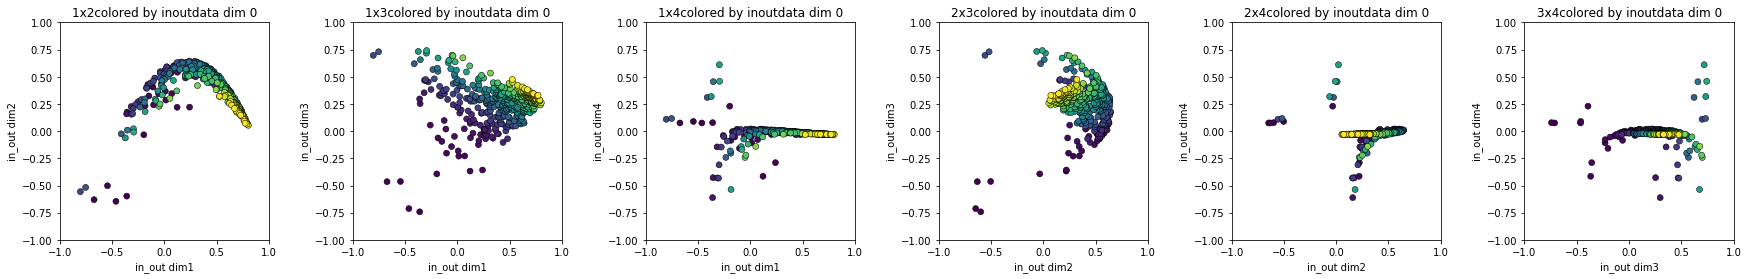

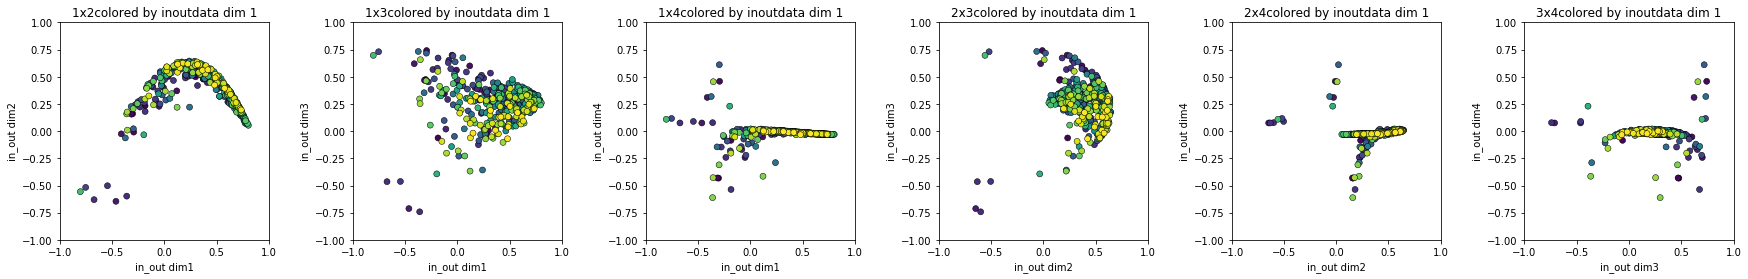

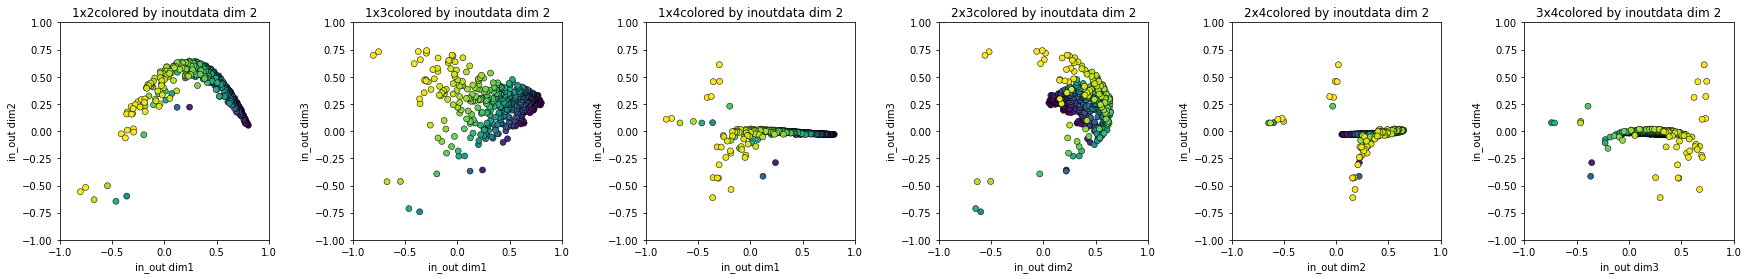

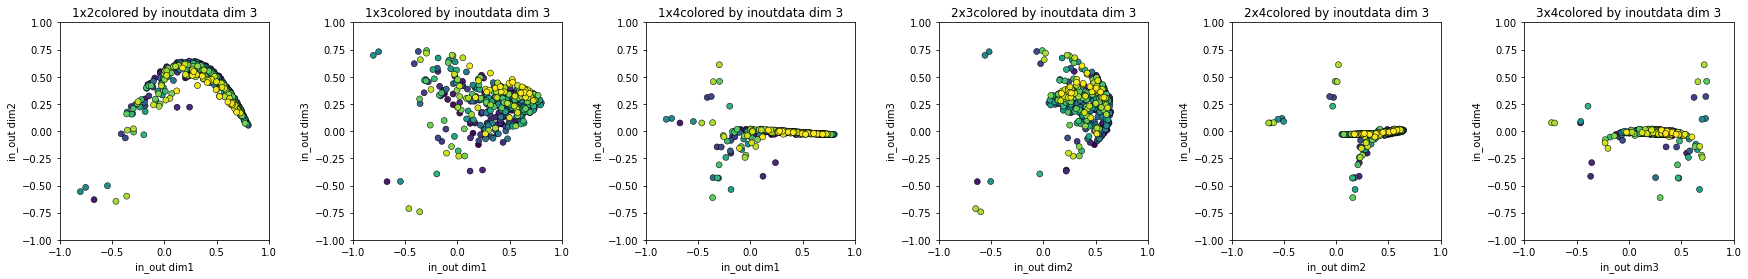

In [63]:
#color combinations with Smad parameters first, then with Snail paramters
#Smad dim1 and dim2 color 2 of the 3(or4) dimensions. Thus, you only need to know one more thing.
print(ev_inout)
shave = evecs_combined
shave = shaver(evecs_combined,evals_combined,eps_combined)
# ev_inout=[1,5,2,11]

for j in range(datainout.shape[1]):
    print(j,end="")
    
    
#     if j==1:
#         cvidx = np.where(cvec>0)
#         cvec[cvidx]=0
    cvec = datainout[:,j].copy()
#     cvec2 = range(len(cvec))
    cvec2 = np.argsort(cvec)
    cvec = range(len(cvec2))
    comb = combinations(range(len(ev_inout)),2)
    listcomb = list(comb)
    fig,ax = plt.subplots(1,len(listcomb),figsize=(5*len(listcomb),4),sharey=False)
    plt.subplots_adjust(wspace=0.4)
    cc3 = dosage_data
    for i in range(len(listcomb)):
        lci=listcomb[i]
        
        ax[i].scatter(shave[cvec2,ev_inout[lci[0]]],shave[cvec2,ev_inout[lci[1]]],c=cvec,edgecolor=[0,0,0],linewidths=0.5)
        ax[i].set_xlabel('in_out dim%d' % (lci[0]+1))
        ax[i].set_ylabel('in_out dim%d' % (lci[1]+1))
        ax[i].set_title(str(lci[0]+1)+"x"+str(lci[1]+1)+"colored by inoutdata dim %d"  %j)
        ax[i].set_xlim(-1,1)
        ax[i].set_ylim(-1,1)
#         if i==1:
#             ax[i].set_ylim(-0.35,0.35)
            



[ 1  7  2 15]
0123

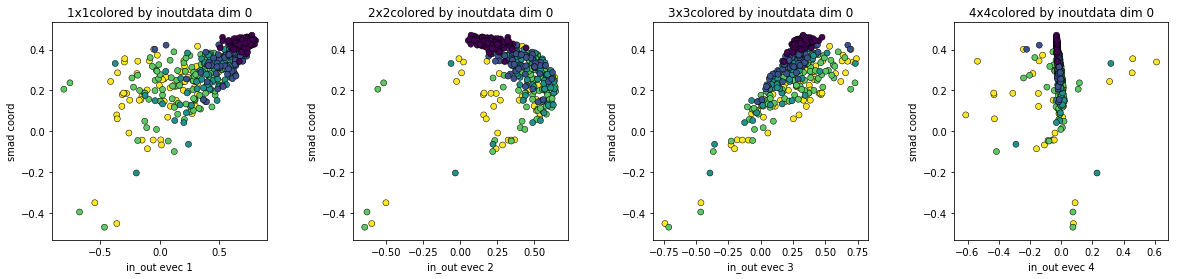

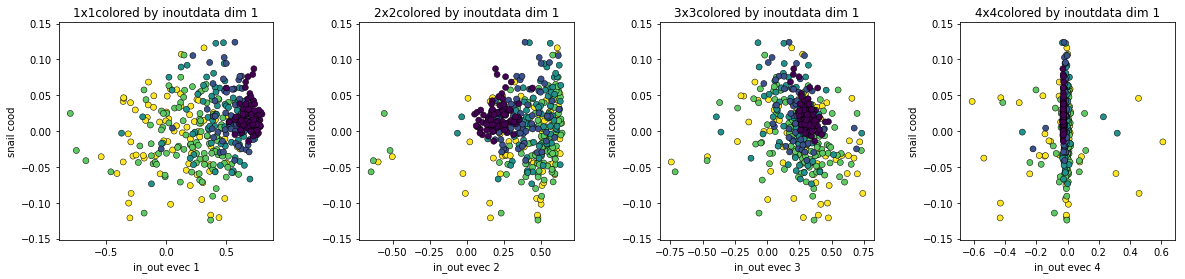

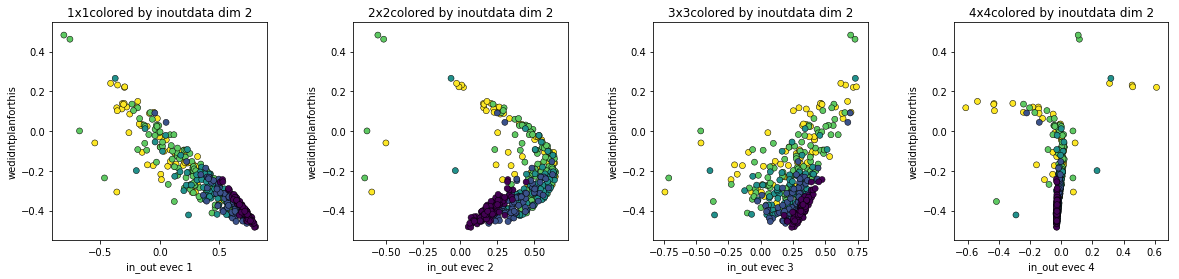

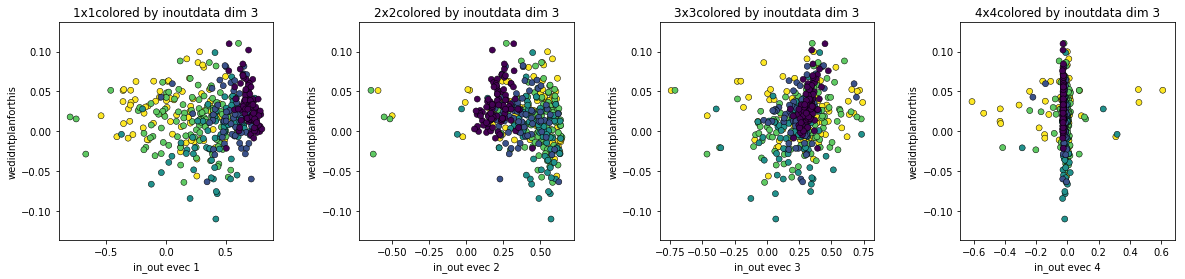

In [64]:
#color combinations with Smad parameters first, then with Snail paramters
#Smad dim1 and dim2 color 2 of the 3(or4) dimensions. Thus, you only need to know one more thing.
print(ev_inout)
shave = evecs_combined
shave = shaver(evecs_combined,evals_combined,eps_combined)
# ev_inout=np.add([1,2,3,4],0)

for j in range(datainout.shape[1]):
    print(j,end="")
    
    
#     if j==1:
#         cvidx = np.where(cvec>0)
#         cvec[cvidx]=0
    cvec = datainout[:,j].copy()
    cvec2 = range(len(cvec))
#     cvec2 = np.argsort(cvec)
#     cvec = range(len(cvec2))
    comb = combinations(range(len(ev_inout)),2)
    listcomb = list(comb)
    fig,ax = plt.subplots(1,len(ev_inout),figsize=(5*len(ev_inout),4),sharey=False)
    plt.subplots_adjust(wspace=0.4)
    cc3 = dosage_data
    for i in range(len(ev_inout)):
#         lci=listcomb[i]
#         lci[0]=int(i)
        ax[i].scatter(shave[cvec2,ev_inout[i]],cvec,c=dosage_data,edgecolor=[0,0,0],linewidths=0.5)
        if j == 0:
            ylabelstr = 'smad coord'
        elif j==1:
            ylabelstr = 'snail cood'
        else: 
            ylabelstr = 'wedidntplanforthis'
            
        ax[i].set_ylabel(ylabelstr)
        ax[i].set_xlabel('in_out evec %d' % (i+1))
        ax[i].set_title(str(i+1)+"x"+str(i+1)+"colored by inoutdata dim %d"  %j)
#         ax[i].set_xlim(-1.1,1.1)
#         ax[i].set_ylim(-1.1,1.1)
#         if i==1:
#             ax[i].set_ylim(-0.35,0.35)
            



In [86]:
ev_in_v = [1,4]
ev_out_v = [1,10]

/Users/frick/Dparams/DParams_2017_04_17_v3/2d-manifold_exp3tcut/ snailC 2d man.png
done


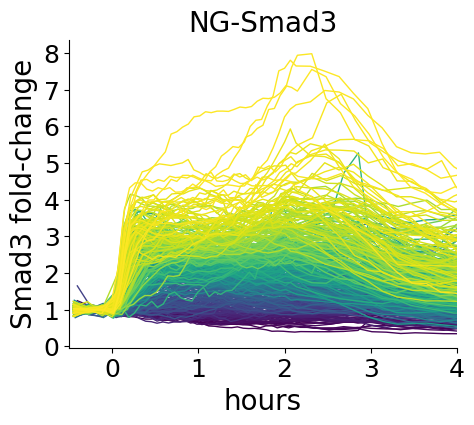

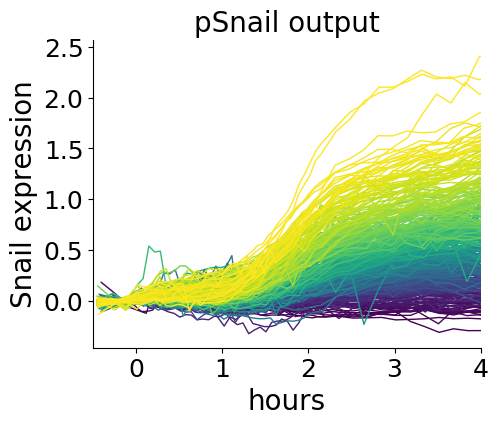

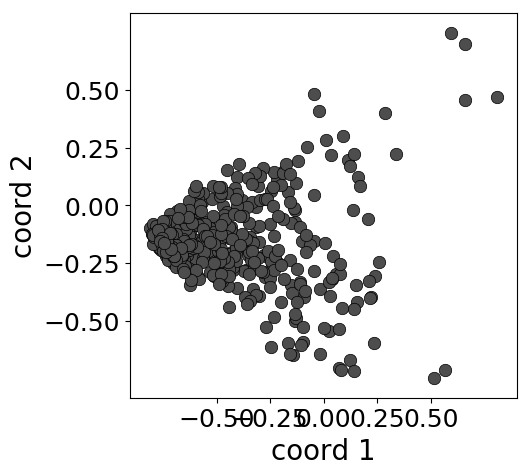

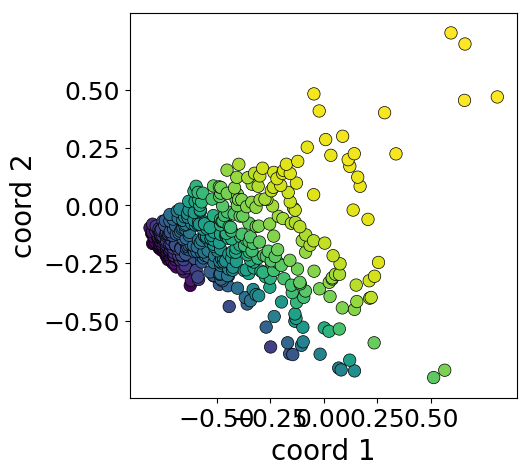

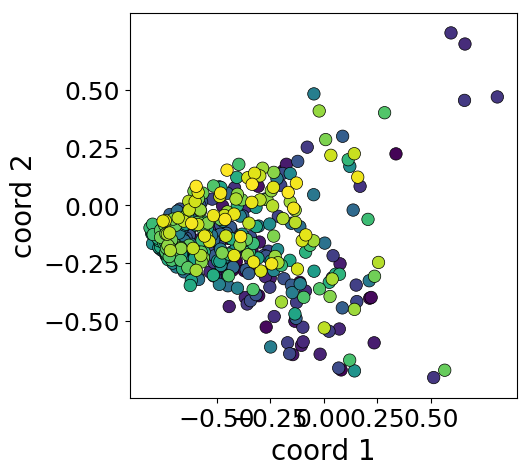

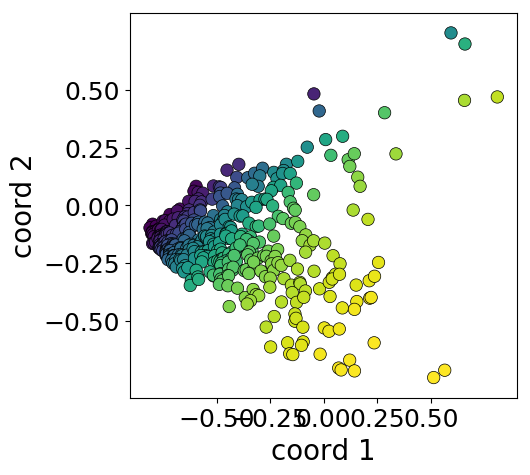

In [58]:
savepath = str(cwd) + '/2d-manifold_' +conditionid+cond2+'/'
if not os.path.exists(savepath):
    os.makedirs(savepath)
    
fontsize=20
plt.style.use('default')
# plt.style.use('ggplot')   
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['font.family'] = 'DejaVu Sans'


#### make plots for 2d manifold figure
def plot_trajectories_for_figure(tvec,traj,evecs_0,ev_0,strstr,smadsnail):
    #plot the Smad trajectories colored by info
#     fig,ax = plt.subplots(2,len(ev_0),figsize=(len(ev_0)*8,8),sharey=False)
    
    if smadsnail=='Smad':
        responsename = '3 fold-change'
        titlestr = 'NG-Smad3'
    else:
        responsename = ' expression'
        titlestr = 'pSnail output'
        
    fsize = (2,3)
    fig = plt.figure(figsize=fsize)
    ax = fig.add_subplot(111)
    x = np.transpose(tvec)/60
    y = np.transpose(traj)
    for i in range(len(ev_0)):
        lp = np.linspace(0,1,y.shape[1])
        ev_in_v = ev_0[i]
        hh = np.argsort(evecs_0[:,ev_in_v])
        cmvec = lp[hh]
        
        color=iter(plt.cm.viridis(lp))
        
        for k in range(y.shape[1]):
            xs = x[:,hh[k]]
            xs0 = numpy.where(xs<=0)
            tv0 = xs0[0]
            ys = y[:,hh[k]]

            c=next(color)
            plt.plot(xs,ys,c=c,linewidth=1,alpha=1)
#             plt.title(strstr+' dim %g' % (i+1),fontsize=fontsize)

        plt.title(titlestr,fontsize=fontsize)
        plt.xlim(-0.5,4)
        plt.xticks([0,1,2,3,4],fontsize=fontsize-2)
        plt.yticks(fontsize=fontsize-2)
        plt.ylabel(smadsnail+responsename,fontsize=fontsize)
        plt.xlabel('hours',fontsize=fontsize)
#         ax.spines['right'].set_color('k')
#         ax.spines['top'].set_color('k')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.spines['left'].set_color('k')
        ax.spines['bottom'].set_color('k')
        savestr = savepath+' '+smadsnail+' 2d-man traces.png'
        plt.savefig(savestr,bbox_inches='tight')
            

            
     
plot_trajectories_for_figure(timedin,ogddin,evecs_in,[1],'Input','Smad')
plot_trajectories_for_figure(timedout,ogddout,evecs_out,[1],'Output','Snail')

# ev_inout=[1,6]
fsize = (5,5)
msize = 80
lw = 0.5
cmap = plt.cm.viridis
shavecombo = shaver(evecs_combined,evals_combined,eps_combined)
fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111)
x = shavecombo[:,ev_inout[0]]
y = shavecombo[:,ev_inout[2]]
xx=x
yy=y
plt.scatter(xx,yy,s=msize,color=[0.3,0.3,0.3],edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('coord 1',fontsize=fontsize)
plt.ylabel('coord 2',fontsize=fontsize)
xtickvec = np.linspace(-1,1,5)
plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)
savestr = savepath+' uncolored 2d man.png'
plt.savefig(savestr,bbox_inches='tight')

fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111)
cc = datainout[:,0].copy()
csort = range(len(cc))
csort = np.argsort(cc)
cc = range(len(csort))
xx = x[csort]
yy = y[csort]

# cw = np.where(cc>0)
# cc[cw]=0
plt.scatter(xx,yy,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('coord 1',fontsize=fontsize)
plt.ylabel('coord 2',fontsize=fontsize)
plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)
savestr = savepath+' smadC 2d-1 man.png'
plt.savefig(savestr,bbox_inches='tight')

fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111)
cc = datainout[:,1].copy()
csort = range(len(cc))
csort = np.argsort(cc)
cc = range(len(csort))
xx = x[csort]
yy = y[csort]


# cw = np.where(cc>0)
# cc[cw]=0

plt.scatter(xx,yy,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('coord 1',fontsize=fontsize)
plt.ylabel('coord 2',fontsize=fontsize)
plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)
savestr = savepath+' smadC 2d-2 man.png'
plt.savefig(savestr,bbox_inches='tight')

fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111)
cc = datainout[:,-2].copy()
csort = range(len(cc))
csort = np.argsort(cc)
cc = range(len(csort))
xx = x[csort]
yy = y[csort]

plt.scatter(xx,yy,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('coord 1',fontsize=fontsize)
plt.ylabel('coord 2',fontsize=fontsize)
plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)
savestr = savepath+' snailC 2d man.png'
plt.savefig(savestr,bbox_inches='tight')
print(savestr)
print('done')

In [ ]:
# evecs_combined[:,3]=evecs_combined[:,3]*-1

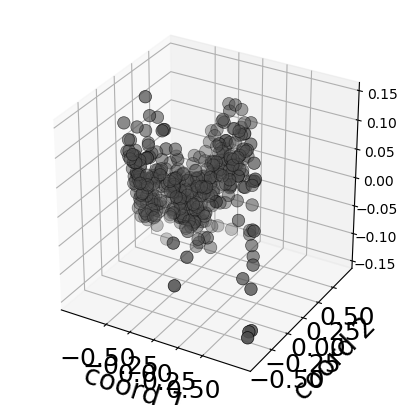

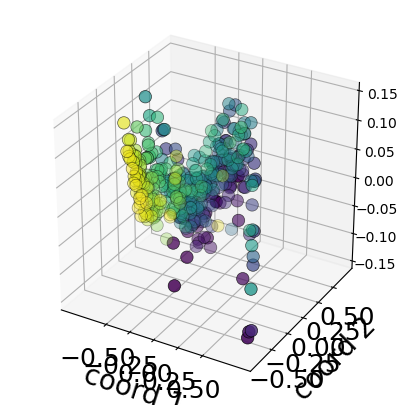

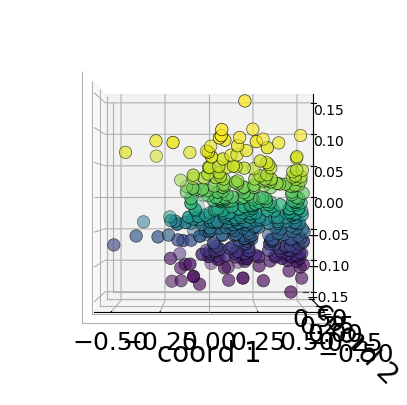

/Users/frick/Dparams/DParams_2017_04_17_v3/2d-manifold_exp4tcut/ snailC 3d man.png
done


In [53]:
savepath = str(cwd) + '/2d-manifold_' +conditionid+cond2+'/'
if not os.path.exists(savepath):
    os.makedirs(savepath)
    
fontsize=20
plt.style.use('default')
# plt.style.use('ggplot')   
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['font.family'] = 'DejaVu Sans'


#### make plots for 2d manifold figure
def plot_trajectories_for_figure(tvec,traj,evecs_0,ev_0,strstr,smadsnail):
    #plot the Smad trajectories colored by info
#     fig,ax = plt.subplots(2,len(ev_0),figsize=(len(ev_0)*8,8),sharey=False)
    
    if smadsnail=='Smad':
        responsename = '3 fold-change'
        titlestr = 'NG-Smad3'
    else:
        responsename = ' expression'
        titlestr = 'pSnail output'
        
    fsize = (5,4)
    fig = plt.figure(figsize=fsize)
    ax = fig.add_subplot(111)
    x = np.transpose(tvec)
    y = np.transpose(traj)
    for i in range(len(ev_0)):
        lp = np.linspace(0,1,y.shape[1])
        ev_in_v = ev_0[i]
        hh = np.argsort(evecs_0[:,ev_in_v])
        cmvec = lp[hh]
        
        color=iter(plt.cm.viridis(lp))
        
        for k in range(y.shape[1]):
            xs = x[:,hh[k]]
            xs0 = numpy.where(xs<=0)
            tv0 = xs0[0]
            ys = y[:,hh[k]]

            c=next(color)
            plt.plot(xs,ys,c=c,linewidth=1,alpha=1)
#             plt.title(strstr+' dim %g' % (i+1),fontsize=fontsize)

        plt.title(titlestr,fontsize=fontsize)
        plt.xlim(-0.5,4)
        plt.xticks([0,1,2,3,4],fontsize=fontsize-2)
        plt.yticks(fontsize=fontsize-2)
        plt.ylabel(smadsnail+responsename,fontsize=fontsize)
        plt.xlabel('hours',fontsize=fontsize)
#         ax.spines['right'].set_color('k')
#         ax.spines['top'].set_color('k')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.spines['left'].set_color('k')
        ax.spines['bottom'].set_color('k')
        savestr = savepath+' '+smadsnail+' 2d-man traces.png'
        plt.savefig(savestr,bbox_inches='tight')
            

            
     
# plot_trajectories_for_figure(timedin,ogddin,evecs_in,[1],'Input','Smad')
# plot_trajectories_for_figure(timedout,ogddout,evecs_out,[1],'Output','Snail')

ev_inout=[1,3]
fsize = (5,5)
msize = 80
lw = 0.5
cmap = plt.cm.viridis
shavecombo = shaver(evecs_combined,evals_combined,eps_combined)
fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(111)
x = shavecombo[:,ev_inout[0]]
y = shavecombo[:,ev_inout[1]]
z = datainout[:,-1].copy()
xx=x
yy=y
zz=z
ax.scatter(xx,yy,zz,s=msize,color=[0.3,0.3,0.3],edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('coord 1',fontsize=fontsize)
plt.ylabel('coord 2',fontsize=fontsize)
xtickvec = np.linspace(-1,1,5)
plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)
savestr = savepath+' uncolored 3d man.png'
plt.savefig(savestr,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111, projection='3d')
cc = datainout[:,0].copy()
csort = range(len(cc))
csort = np.argsort(cc)
cc = range(len(csort))
xx = x[csort]
yy = y[csort]
zz = z[csort]

# cw = np.where(cc>0)
# cc[cw]=0
ax.scatter(xx,yy,zz,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('coord 1',fontsize=fontsize)
plt.ylabel('coord 2',fontsize=fontsize)
plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)
savestr = savepath+' smadC 3d man.png'
plt.savefig(savestr,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111, projection='3d')
x = datainout[:,0].copy()
y = datainout[:,1].copy()
cc = datainout[:,-1].copy()
csort = np.argsort(cc)
cc = range(len(csort))
# cw = np.where(cc>0)
# cc[cw]=0
# csort = range(len(cc))
xx = x[csort]
yy = y[csort]
zz = z[csort]


ax.scatter(xx,yy,zz,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('coord 1',fontsize=fontsize)
plt.ylabel('coord 2',fontsize=fontsize)
plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)
savestr = savepath+' snailC 3d man.png'
plt.savefig(savestr,bbox_inches='tight')
ax.view_init(0,-90)
plt.show()

print(savestr)
print('done')

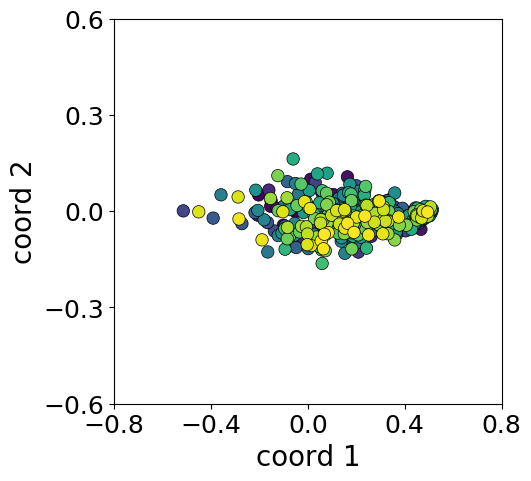

/Users/frick/Dparams/DParams_2017_04_17_v3/2d-manifold_exp4tcut/ smad manifold colored by snail.png
done


In [54]:
savepath = str(cwd) + '/2d-manifold_' +conditionid+cond2+'/'
if not os.path.exists(savepath):
    os.makedirs(savepath)
    
fontsize=20
plt.style.use('default')
# plt.style.use('ggplot')   
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['font.family'] = 'DejaVu Sans'


fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111)
x = datainout[:,0].copy()
y = datainout[:,1].copy()
cc = datainout[:,-1].copy()
csort = range(len(cc))
csort = np.argsort(cc)
cc = range(len(csort))
# cw = np.where(cc>0)
# cc[cw]=0

xx = x[csort]
yy = y[csort]
zz = z[csort]


ax.scatter(xx,yy,c=cc,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('coord 1',fontsize=fontsize)
plt.ylabel('coord 2',fontsize=fontsize)

xtickvec= np.linspace(-1.6,1.6,5)
plt.xticks(np.divide(xtickvec,2),fontsize=fontsize-2)
xtickvec= np.linspace(-1.2,1.2,5)
plt.yticks(np.divide(xtickvec,2),fontsize=fontsize-2)
savestr = savepath+' smad manifold colored by snail.png'
plt.savefig(savestr,bbox_inches='tight')

plt.show()

print(savestr)
print('done')

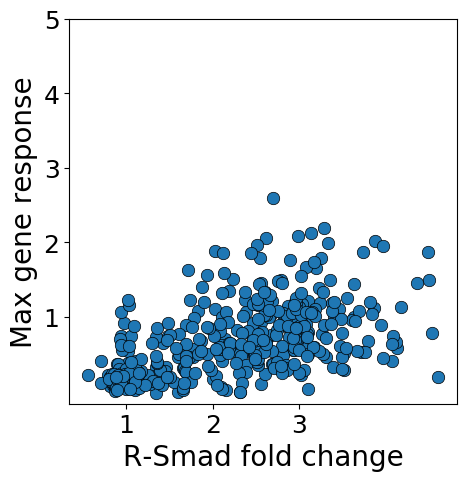

/Users/frick/Dparams/DParams_2017_04_17_v3/2d-manifold_exp4tcut/R-smadFC vs peak gene.png
done


In [56]:
savepath = str(cwd) + '/2d-manifold_' +conditionid+cond2+'/'
if not os.path.exists(savepath):
    os.makedirs(savepath)
    
fontsize=20
plt.style.use('default')
# plt.style.use('ggplot')   
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['font.family'] = 'DejaVu Sans'


fig = plt.figure(figsize=fsize)
ax = fig.add_subplot(111)
tt = tvec

# print(ogddin[1,:].shape)
tvec = timedin[1,:]
# print(tvec.shape)
tfc = np.where(tvec>20)
tfc1 = tfc[0]
# print(tfc1)
x = ogddin[:,tfc1[0]]
jmax = np.ones(ogddout.shape[0])
# print(jmax)
for j in range(ogddout.shape[0]):
    jmax[j]=np.max(ogdout[j,:])
y=jmax

# print(x)
# print(y)

# x = datainout[:,0].copy()
# y = datainout[:,1].copy()
# cc = datainout[:,-1].copy()
# csort = range(len(cc))
# csort = np.argsort(cc)
# cc = range(len(csort))
# cw = np.where(cc>0)
# cc[cw]=0

# xx = x[csort]
# yy = y[csort]
# zz = z[csort]

# print(x)
# ax.scatter(x,y)
cc = dosage_data
ax.scatter(x,y,s=msize,edgecolor='k',linewidths=lw, cmap = cmap)
plt.xlabel('R-Smad fold change',fontsize=fontsize)
plt.ylabel('Max gene response',fontsize=fontsize)
xtickvec = np.linspace(1,3,3)
ytickvec = np.linspace(1,5,5)
plt.xticks(np.divide(xtickvec,1),fontsize=fontsize-2)
plt.yticks(np.divide(ytickvec,1),fontsize=fontsize-2)
savestr = savepath+'R-smadFC vs peak gene.png'
plt.savefig(savestr,bbox_inches='tight')

plt.show()

print(savestr)
print('done')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


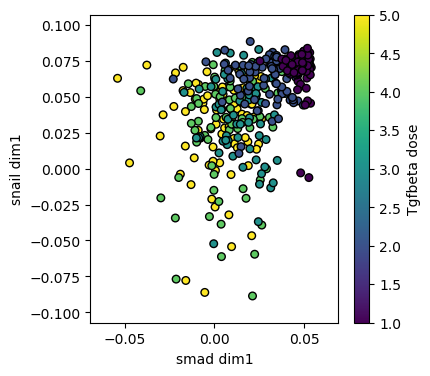

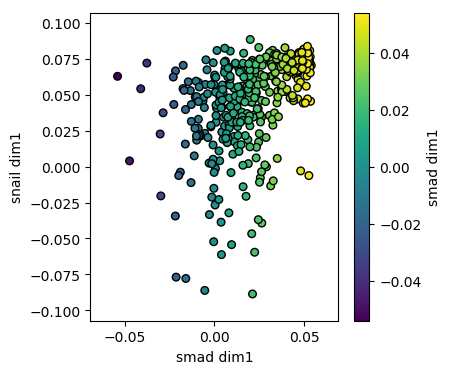

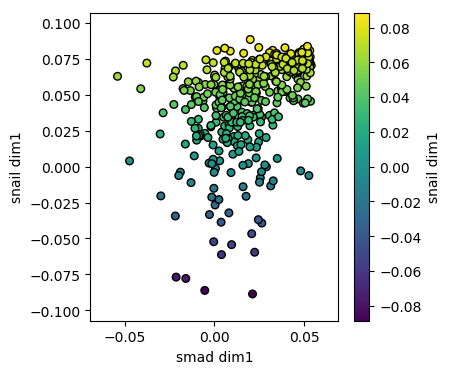

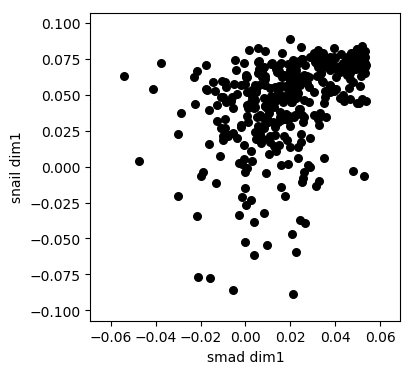

[[0.267004 0.004874 0.329415 1.      ]
 [0.26851  0.009605 0.335427 1.      ]
 [0.269944 0.014625 0.341379 1.      ]
 [0.271305 0.019942 0.347269 1.      ]
 [0.272594 0.025563 0.353093 1.      ]]
[0.267004 0.004874 0.329415 1.      ]
[0. 1. 0. 0. 0.]


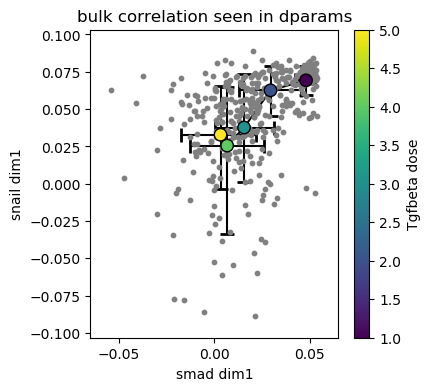

done
[[0.267004 0.004874 0.329415 1.      ]
 [0.26851  0.009605 0.335427 1.      ]
 [0.269944 0.014625 0.341379 1.      ]
 [0.271305 0.019942 0.347269 1.      ]
 [0.272594 0.025563 0.353093 1.      ]]
[0.267004 0.004874 0.329415 1.      ]
[0. 1. 0. 0. 0.]


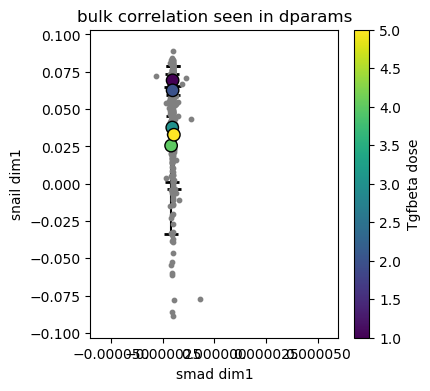

[[0.267004 0.004874 0.329415 1.      ]
 [0.26851  0.009605 0.335427 1.      ]
 [0.269944 0.014625 0.341379 1.      ]
 [0.271305 0.019942 0.347269 1.      ]
 [0.272594 0.025563 0.353093 1.      ]]
[0.267004 0.004874 0.329415 1.      ]
[0. 1. 0. 0. 0.]


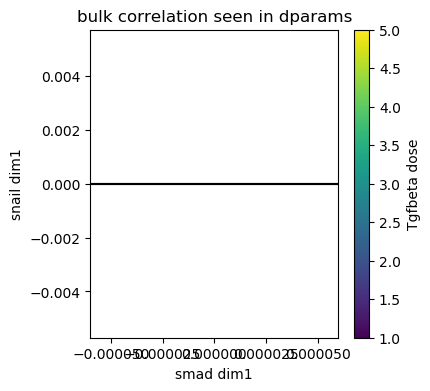

done


In [60]:
#note evecs are reversed so increasing Smad3 goes from left to right
ev_in =[1]
ev_out = [1]
cc3 = dosage_data
fig,ax = plt.subplots(1,1,figsize=(4,4),sharey=False)
x = evecs_in[:,ev_in[0]]*evals_in[ev_in[0]]*(1)
y = evecs_out[:,ev_out[0]]*evals_out[ev_out[0]]*(1)
plt.scatter(x,y,s=30,c=cc3, edgecolor='k')
plt.xlabel('smad dim1')
plt.ylabel('snail dim1')
cbar = plt.colorbar()
cbar.set_label('Tgfbeta dose')
# plt.xlim(-0.04,0.04)
# plt.ylim(-0.01,0.01)
plt.axis('tight')
plt.show()


ev_in =[1]
ev_out = [1]
cc3 = dosage_data
fig,ax = plt.subplots(1,1,figsize=(4,4),sharey=False)
x = evecs_in[:,ev_in[0]]*evals_in[ev_in[0]]*(1)
y = evecs_out[:,ev_out[0]]*evals_out[ev_out[0]]*(1)
plt.scatter(x,y,s=30,c=x, edgecolor='k')
plt.xlabel('smad dim1')
plt.ylabel('snail dim1')
cbar = plt.colorbar()
cbar.set_label('smad dim1')
# plt.xlim(-0.04,0.04)
# plt.ylim(-0.01,0.01)
plt.axis('tight')
plt.show()

ev_in =[1]
ev_out = [1]
cc3 = dosage_data
fig,ax = plt.subplots(1,1,figsize=(4,4),sharey=False)
x = evecs_in[:,ev_in[0]]*evals_in[ev_in[0]]*(1)
y = evecs_out[:,ev_out[0]]*evals_out[ev_out[0]]*(1)
plt.scatter(x,y,s=30,c=y, edgecolor='k')
plt.xlabel('smad dim1')
plt.ylabel('snail dim1')
cbar = plt.colorbar()
cbar.set_label('snail dim1')
# plt.xlim(-0.04,0.04)
# plt.ylim(-0.01,0.01)
plt.axis('tight')
plt.show()


fig,ax = plt.subplots(1,1,figsize=(4,4),sharey=False)
x = evecs_in[:,ev_in[0]]*evals_in[ev_in[0]]*(1)
y = evecs_out[:,ev_out[0]]*evals_out[ev_out[0]]*(1)
plt.scatter(x,y,s=30,color='k', edgecolor='k')
plt.xlabel('smad dim1')
plt.ylabel('snail dim1')
# cbar = plt.colorbar()
# cbar.set_label('Tgfbeta dose')
# plt.xlim(-0.04,0.04)
# plt.ylim(-0.01,0.01)
plt.axis('tight')
plt.show()


x = evecs_in[:,ev_in[0]]*evals_in[ev_in[0]]*(1)
xcorr =x.copy()
ycorr = y.copy()



fig,ax = plt.subplots(1,1,figsize=(4,4),sharey=False)
udose = np.unique(dosage_data)
cmap = plt.cm.viridis(range(len(udose)))
# x = evecs_in[:,ev_in[0]]*evals_in[ev_in[0]]
# y = evecs_out[:,ev_out[0]]*evals_out[ev_out[0]]
print(cmap)
print(cmap[0])
xm = np.zeros(len(udose))
ym = np.zeros(len(udose))
xl = np.zeros(len(udose))
xh = np.zeros(len(udose))
yl = np.zeros(len(udose))
yh = np.zeros(len(udose))
xm[1]=1
print(xm)
for i in range(len(udose)):
    xidx = np.where(dosage_data==udose[i])
    xs = x[xidx]
    ys = y[xidx]
    xm[i] = np.mean(xs)
    ym[i] = np.mean(ys)
    xl[i] = np.percentile(xs,10)
    xh[i] = np.percentile(xs,90)
    yl[i] = np.percentile(ys,10)
    yh[i] = np.percentile(ys,90)
    
# plt.plot(xm,ym,'ko')

plt.scatter(x,y,s=10,color=[0.5,0.5,0.5])
sc = plt.errorbar(xm,ym,yerr=[ym-yl, yh-ym], xerr=[xm-xl, xh-xm], color='k', markeredgewidth=2,capsize=5, marker="", alpha=1, ecolor='k',zorder=0)

plt.scatter(xm,ym,s=80,c=udose, edgecolor='k', marker='o', alpha=1, zorder=10)
plt.xlabel('smad dim1')
plt.ylabel('snail dim1')
plt.title('bulk correlation seen in dparams')
cbar = plt.colorbar()
cbar.set_label('Tgfbeta dose')
plt.show()


# ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')
# ax.set_title('H, V asymmetric')
print('done')

ev_in=[1,9]
x = evecs_in[:,ev_in[1]]*evals_in[ev_in[1]]*(1)
xcorr =x.copy()
ycorr = y.copy()



fig,ax = plt.subplots(1,1,figsize=(4,4),sharey=False)
udose = np.unique(dosage_data)
cmap = plt.cm.viridis(range(len(udose)))
# x = evecs_in[:,ev_in[0]]*evals_in[ev_in[0]]
# y = evecs_out[:,ev_out[0]]*evals_out[ev_out[0]]
print(cmap)
print(cmap[0])
xm = np.zeros(len(udose))
ym = np.zeros(len(udose))
xl = np.zeros(len(udose))
xh = np.zeros(len(udose))
yl = np.zeros(len(udose))
yh = np.zeros(len(udose))
xm[1]=1
print(xm)
for i in range(len(udose)):
    xidx = np.where(dosage_data==udose[i])
    xs = x[xidx]
    ys = y[xidx]
    xm[i] = np.mean(xs)
    ym[i] = np.mean(ys)
    xl[i] = np.percentile(xs,10)
    xh[i] = np.percentile(xs,90)
    yl[i] = np.percentile(ys,10)
    yh[i] = np.percentile(ys,90)
    
# plt.plot(xm,ym,'ko')

plt.scatter(x,y,s=10,color=[0.5,0.5,0.5])
sc = plt.errorbar(xm,ym,yerr=[ym-yl, yh-ym], xerr=[xm-xl, xh-xm], color='k', markeredgewidth=2,capsize=5, marker="", alpha=1, ecolor='k',zorder=0)

plt.scatter(xm,ym,s=80,c=udose, edgecolor='k', marker='o', alpha=1, zorder=10)
plt.xlabel('smad dim1')
plt.ylabel('snail dim1')
plt.title('bulk correlation seen in dparams')
cbar = plt.colorbar()
cbar.set_label('Tgfbeta dose')
plt.xlim(-0.00006,0.00006)
plt.show()




ev_in=[1,9]
x = evecs_in[:,ev_in[0]]*evals_in[ev_in[0]]*(1)
y = evecs_in[:,ev_in[1]]*evals_in[ev_in[1]]*(1)
xcorr =x.copy()
ycorr = y.copy()



fig,ax = plt.subplots(1,1,figsize=(4,4),sharey=False)
udose = np.unique(dosage_data)
cmap = plt.cm.viridis(range(len(udose)))
# x = evecs_in[:,ev_in[0]]*evals_in[ev_in[0]]
# y = evecs_out[:,ev_out[0]]*evals_out[ev_out[0]]
print(cmap)
print(cmap[0])
xm = np.zeros(len(udose))
ym = np.zeros(len(udose))
xl = np.zeros(len(udose))
xh = np.zeros(len(udose))
yl = np.zeros(len(udose))
yh = np.zeros(len(udose))
xm[1]=1
print(xm)
for i in range(len(udose)):
    xidx = np.where(dosage_data==udose[i])
    xs = x[xidx]
    ys = y[xidx]
    xm[i] = np.mean(xs)
    ym[i] = np.mean(ys)
    xl[i] = np.percentile(xs,10)
    xh[i] = np.percentile(xs,90)
    yl[i] = np.percentile(ys,10)
    yh[i] = np.percentile(ys,90)
    
# plt.plot(xm,ym,'ko')

plt.scatter(x,y,s=10,color=[0.5,0.5,0.5])
sc = plt.errorbar(xm,ym,yerr=[ym-yl, yh-ym], xerr=[xm-xl, xh-xm], color='k', markeredgewidth=2,capsize=5, marker="", alpha=1, ecolor='k',zorder=0)

plt.scatter(xm,ym,s=80,c=udose, edgecolor='k', marker='o', alpha=1, zorder=10)
plt.xlabel('smad dim1')
plt.ylabel('snail dim1')
plt.title('bulk correlation seen in dparams')
cbar = plt.colorbar()
cbar.set_label('Tgfbeta dose')
plt.xlim(-0.00006,0.00006)
plt.show()
# ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')
# ax.set_title('H, V asymmetric')
print('done')

In [61]:
from itertools import chain
newlist = [list(combinations(ev_inout,i)) for i in range(1,len(ev_inout)+1)]
# newlist = np.array(newlist[:])
merged = list(chain(*newlist))
# print(newlist)
print(merged)
print(len(merged))



[(1,), (3,), (2,), (8,), (1, 3), (1, 2), (1, 8), (3, 2), (3, 8), (2, 8), (1, 3, 2), (1, 3, 8), (1, 2, 8), (3, 2, 8), (1, 3, 2, 8)]
15


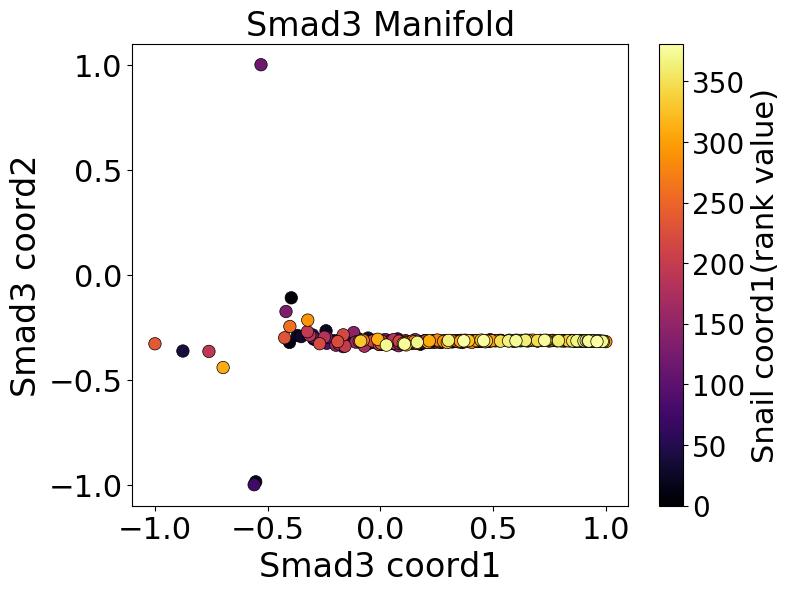

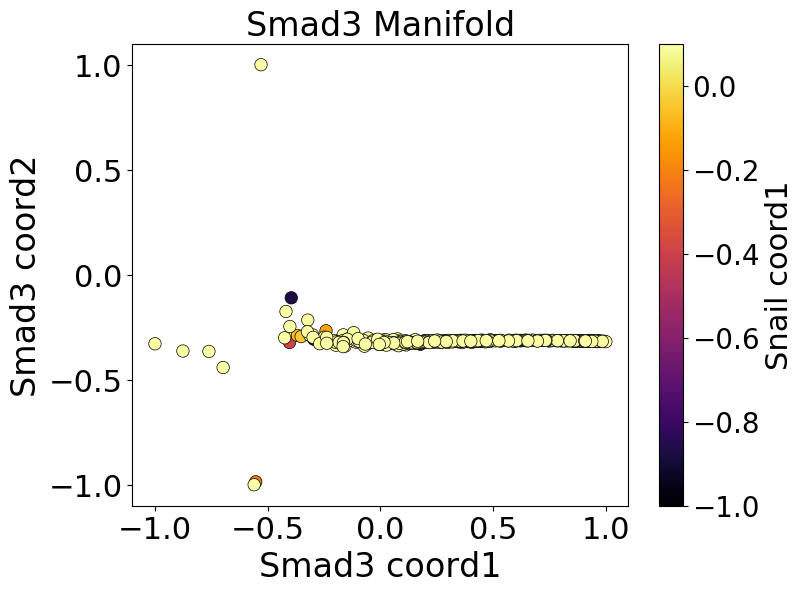

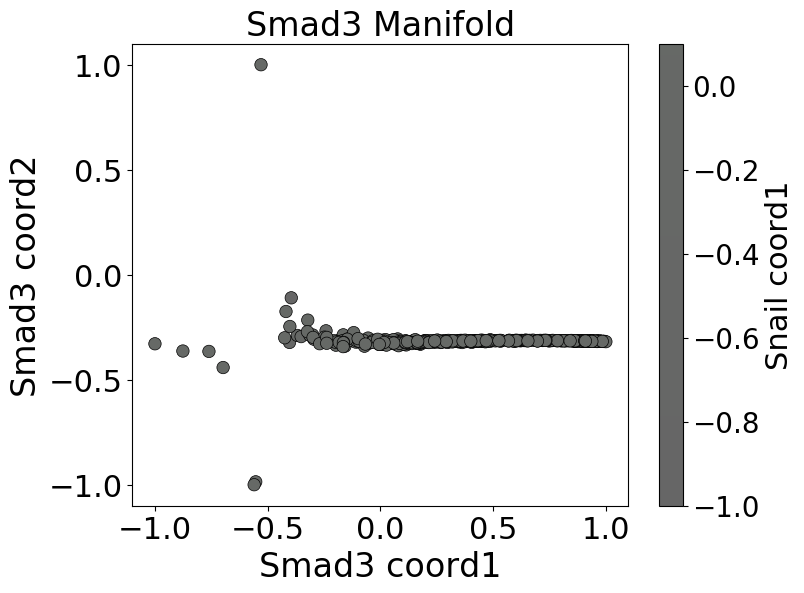

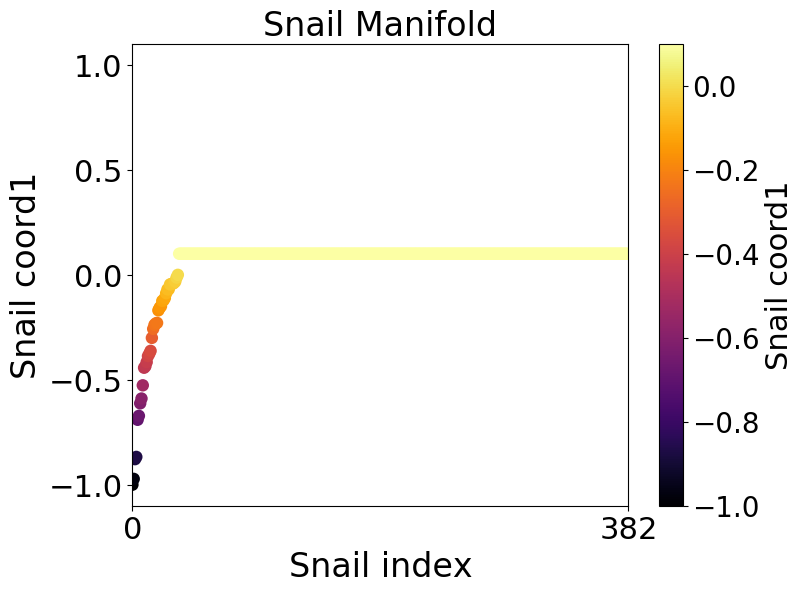

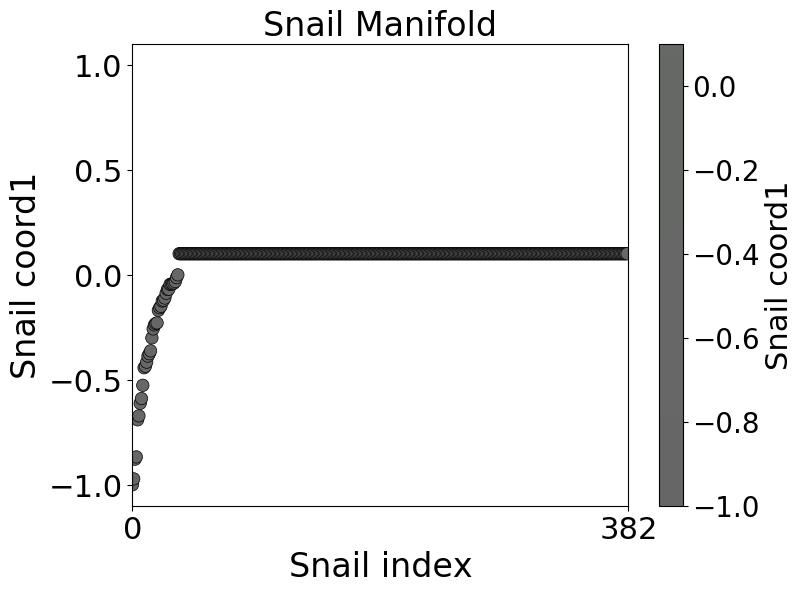

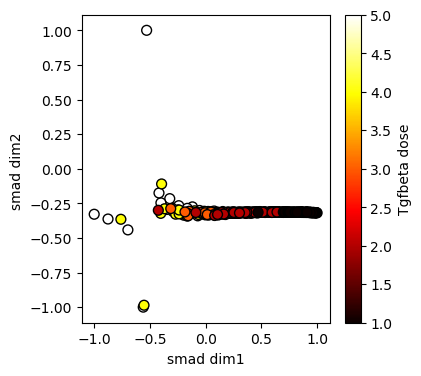

NameError: name 'snailidx' is not defined

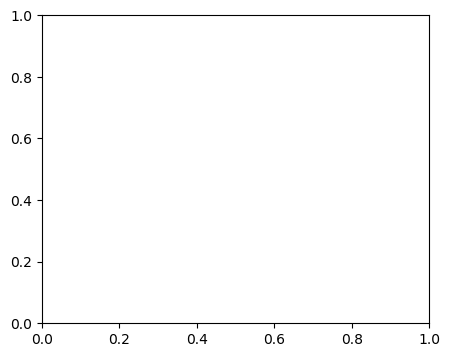

In [62]:
#plots for presentation

plt.style.use('default')
import os
import matplotlib.cm as cm

# cmapred = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black",])

savepath = str(cwd) + '/2dfigs/'
if not os.path.exists(savepath):
    os.makedirs(savepath)
    
import matplotlib.cm as cm

fontsize = 24
lw=0.5
msize = 80
fsize = (8,6)

#yellow is weak response
#note evecs are reversed so increasing Smad3 goes from left to right
fig,ax = plt.subplots(1,1,figsize=fsize,sharey=False)
cvec = evecs_out.copy()
c1 = cvec[:,ev_out[0]]
csort = np.argsort(c1)
c1 = range(evecs_in.shape[0])
x = evecs_in[csort,ev_in[0]]*(1)
y = evecs_in[csort,ev_in[1]]*(1)

plt.scatter(x,y,s=msize,c=c1, edgecolor='k',linewidths=lw,cmap = cm.inferno)

plt.xlabel('Smad3 coord1',fontsize=fontsize)
plt.ylabel('Smad3 coord2',fontsize=fontsize)
plt.xticks([-1,-0.5,0,0.5,1],fontsize=fontsize-2)
plt.yticks([-1,-0.5,0,0.5,1],fontsize=fontsize-2)
plt.title('Smad3 Manifold',fontsize=fontsize)
savestr = savepath+'S3 manifold colored (ranks)'+'.png'
cbar = plt.colorbar()
cbar.set_label('Snail coord1(rank value)',fontsize=fontsize-2)
cbar.ax.tick_params(labelsize=fontsize-4)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.savefig(savestr,bbox_inches='tight')


        

fig,ax = plt.subplots(1,1,figsize=fsize,sharey=False)
cvec = evecs_out.copy()
c1 = cvec[:,ev_out[0]]
c1idx = np.where(c1>0)
c1[c1idx] = 0.1
csort = np.argsort(range(evecs_in.shape[0]))
csort = np.argsort(c1)
c1 = np.sort(c1)
x = evecs_in[csort,ev_in[0]]*(1)
y = evecs_in[csort,ev_in[1]]*(1)

plt.scatter(x,y,s=msize,c=c1, edgecolor='k',linewidths=lw,cmap = cm.inferno)
plt.xlabel('Smad3 coord1',fontsize=fontsize)
plt.ylabel('Smad3 coord2',fontsize=fontsize)
plt.xticks([-1,-0.5,0,0.5,1],fontsize=fontsize-2)
plt.yticks([-1,-0.5,0,0.5,1],fontsize=fontsize-2)
plt.title('Smad3 Manifold',fontsize=fontsize)
savestr = savepath+'S3 manifold colored (raw)'+'.png'
cbar = plt.colorbar()
cbar.set_label('Snail coord1',fontsize=fontsize-2)
cbar.ax.tick_params(labelsize=fontsize-4)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.savefig(savestr,bbox_inches='tight')

fig,ax = plt.subplots(1,1,figsize=fsize,sharey=False)
cmapblack = matplotlib.colors.LinearSegmentedColormap.from_list("", [[0.4,0.4,0.4],[0.4,0.41,0.4]])
plt.scatter(x,y,s=msize,c=c1,facecolor=[0.4,0.4,0.4], edgecolor='k',linewidths=lw,cmap = cmapblack)
plt.xlabel('Smad3 coord1',fontsize=fontsize)
plt.ylabel('Smad3 coord2',fontsize=fontsize)
plt.xticks([-1,-0.5,0,0.5,1],fontsize=fontsize-2)
plt.yticks([-1,-0.5,0,0.5,1],fontsize=fontsize-2)
plt.title('Smad3 Manifold',fontsize=fontsize)
savestr = savepath+'S3 manifold uncolored'+'.png'
cbar = plt.colorbar()
cbar.set_label('Snail coord1',fontsize=fontsize-2)
cbar.ax.tick_params(labelsize=fontsize-4)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.savefig(savestr,bbox_inches='tight')






#######SNAIL


fig,ax = plt.subplots(1,1,figsize=fsize,sharey=False)
c1 = evecs_out[:,ev_out[0]]
c1idx = np.where(c1>0)
c1[c1idx] = 0.1
csort = np.argsort(range(evecs_out.shape[0]))
x = evecs_out[csort,ev_out[0]]*(1)
y = evecs_out[csort,ev_out[0]]*(1)
yarg = np.argsort(y)
ysort= y[yarg]
y = ysort
c1 = y.copy()
c1idx = np.where(c1>0)
c1[c1idx] = 0.1
x = np.linspace(0,len(yarg)-1,len(yarg))
                
plt.scatter(x,y,s=msize,c=c1,edgecolor='None',linewidths=lw,cmap = cm.inferno)
plt.xlabel('Snail index',fontsize=fontsize)
plt.ylabel('Snail coord1',fontsize=fontsize)
plt.xticks([0,len(x)],fontsize=fontsize-2)
plt.yticks([-1,-0.5,0,0.5,1],fontsize=fontsize-2)
plt.title('Snail Manifold',fontsize=fontsize)
savestr = savepath+'Snail manifold colored (raw)'+'.png'
cbar = plt.colorbar()
cbar.set_label('Snail coord1',fontsize=fontsize-2)
cbar.ax.tick_params(labelsize=fontsize-4)
plt.xlim(0,len(x))
plt.ylim(-1.1,1.1)
plt.savefig(savestr,bbox_inches='tight')

fig,ax = plt.subplots(1,1,figsize=fsize,sharey=False)
cmapblack = matplotlib.colors.LinearSegmentedColormap.from_list("", [[0.4,0.4,0.4],[0.4,0.41,0.4]])
plt.scatter(x,y,s=msize,c=c1,facecolor=[0.4,0.4,0.4], edgecolor='k',linewidths=lw,cmap = cmapblack)
plt.xlabel('Snail index',fontsize=fontsize)
plt.ylabel('Snail coord1',fontsize=fontsize)
plt.xticks([0,len(x)],fontsize=fontsize-2)
plt.yticks([-1,-0.5,0,0.5,1],fontsize=fontsize-2)
plt.title('Snail Manifold',fontsize=fontsize)
savestr = savepath+'Snail manifold uncolored'+'.png'
cbar = plt.colorbar()
cbar.set_label('Snail coord1',fontsize=fontsize-2)
cbar.ax.tick_params(labelsize=fontsize-4)
plt.xlim(0,len(x))
plt.ylim(-1.1,1.1)
plt.savefig(savestr,bbox_inches='tight')





############

fig,ax = plt.subplots(1,1,figsize=(4,4),sharey=False)
c1 = dosage_data
csort = np.argsort(range(evecs_in.shape[0]))
x = evecs_in[csort,ev_in[0]]*(1)
y = evecs_in[csort,ev_in[1]]*(1)

plt.scatter(x,y,s=50,c=c1, edgecolor='k', cmap = cm.hot)
plt.xlabel('smad dim1')
plt.ylabel('smad dim2 ')
cbar = plt.colorbar()
cbar.set_label('Tgfbeta dose')

plt.axis('tight')
plt.show()




COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['font.family'] = 'DejaVu Sans'
fig,ax = plt.subplots(1,1,figsize=(5,4),sharey=False)
x = evecs_in[snailidx,ev_in[0]]*evals_in[ev_in[0]]*(1)
y = evecs_in[snailidx,ev_in[1]]*evals_in[ev_in[1]]*(1)
x = evecs_in[snailidx,ev_in[0]]*(1)
y = evecs_in[snailidx,ev_in[1]]*(1)
xm = np.zeros(len(udose))
ym = np.zeros(len(udose))
xl = np.zeros(len(udose))
xh = np.zeros(len(udose))
yl = np.zeros(len(udose))
yh = np.zeros(len(udose))

for i in range(len(udose)):
    xidx = np.where(snaillog==udose[i])
    xs = x[xidx]
    ys = y[xidx]
    xm[i] = np.mean(xs)
    ym[i] = np.mean(ys)
    xl[i] = np.percentile(xs,10)
    xh[i] = np.percentile(xs,90)
    yl[i] = np.percentile(ys,10)
    yh[i] = np.percentile(ys,90)
    
print(ym)
print(yh)
print(yl)

sc1 = plt.scatter(xm,ym,s=200,c=udose, linewidth=1, edgecolor='k', marker='o', alpha=1, zorder=10)
sc2 = plt.errorbar(xm,ym,yerr=[ym-yl, yh-ym], xerr=[xm-xl, xh-xm], color='k', capsize=5, marker="", alpha=1, ecolor='k',zorder=0)
sc3 = plt.scatter(x,y,s=10,color=[0.5,0.5,0.5],zorder=-5)
plt.xlabel('smad dim1',fontsize=14)
plt.ylabel('smad dim2',fontsize=14)
plt.title('smad 1x2 plotted for groups of increasing snail value (binsize='+str(cellsperbin)+')',fontsize=14)
cbar = plt.colorbar(sc1)
cbar.set_label('Snail dim1',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')

[1. 2. 3. 4. 5.]


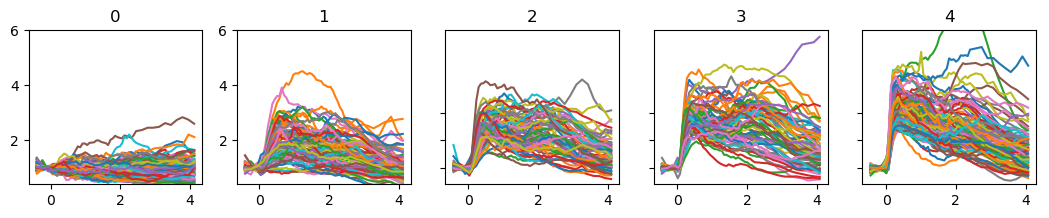

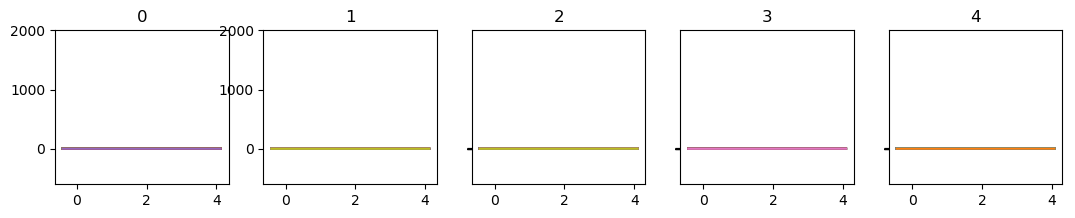

In [63]:
plt.style.use('default')
dose2 = dosage_data.copy()
# dose2 = (dose2-np.min(dose2))/(np.max(dose2)-np.min(dose2))*10
# dose2 = np.ceil(dose2)
# fig,ax = plt.subplots(1,1,figsize=(4,4),sharey=False)
udose = np.unique(dose2)

print(udose)
fig = plt.figure(figsize=(13,2))
for i in range(0,len(udose)):
    xidx = np.where(dosage_data==udose[i])
    xs = x[xidx]
    ys = y[xidx]
    
    ax = fig.add_subplot(1,len(udose),i+1)
    xx = timedin[xidx[0],:]/60
    yy = ogddin[xidx[0],:]

    plt.plot(xx.T,yy.T)
    
    plt.title(i)
    if i>1:
        plt.yticks([0,1,2,3],[],fontsize=12)
    plt.ylim(0.4,6)
  
# fig.adjust_subplots(sharex=True,sharey=True)
plt.show()

fig = plt.figure(figsize=(13,2))
for i in range(0,len(udose)):
    xidx = np.where(dosage_data==udose[i])
    xs = x[xidx]
    ys = y[xidx]
    
    ax = fig.add_subplot(1,len(udose),i+1)
    xx = timedin[xidx[0],:]/60
    yy = ogddout[xidx[0],:]

    plt.plot(xx.T,yy.T)
    
    plt.title(i)
    if i>1:
        plt.yticks([0,1,2,3,4,5,6],[],fontsize=12)
    plt.ylim(-600,2000)
        
plt.show()
# print(np.max(timedout)-np.min(timedout))
# print(timedout.shape)

In [64]:
r = np.corrcoef(xcorr,ycorr)
print(xcorr.shape)
print(r)
r[0,1]

(382,)
[[ 1.        -0.0010384]
 [-0.0010384  1.       ]]


-0.0010383953075229508

In [65]:

x = in1[:,time_in_mat[a]]
y = ogdout[:,time_out_mat[b]]
fig = plt.figure(figsize=(3,3))
plt.scatter(x,y)
plt.title('ABS vs Snail (R=0.4)')
plt.show()

x = ogdin[:,time_in_mat[a]]
y = ogdout[:,time_out_mat[b]]
fig = plt.figure(figsize=(3,3))
plt.scatter(x,y)
plt.title('FC vs Snail (R=0.55)')
plt.show()

NameError: name 'time_in_mat' is not defined

382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6

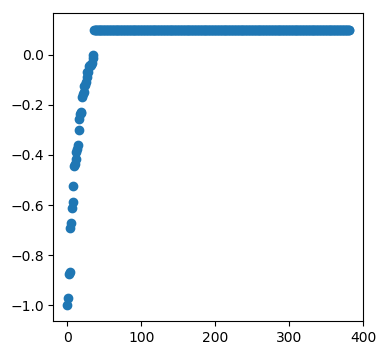

In [66]:
dose2 = dosage_data.copy()
dose2 = (dose2-np.min(dose2))/(np.max(dose2)-np.min(dose2))*10
dose2 = np.ceil(dose2)
fig,ax = plt.subplots(1,1,figsize=(4,4),sharey=False)
udose = np.unique(dose2)
cellsperbin = 50
binnum = int(np.ceil(len(dosage_data)/cellsperbin))
snaildim = evecs_out[:,ev_out[0]]
snailones = np.ones(snaildim.shape)
bn = iter(range(binnum))
snaillog = [snailones[range(i*cellsperbin,np.min([len(snaildim),((i+1)*cellsperbin)]))]*i  for i in range(binnum)]
snaillog = np.hstack(snaillog)
# snaillog = [[(i*cellsperbin) : (np.min([len(snaildim),((i+1)*cellsperbin)+1]))]  for i in range(binnum-1)]
print(len(snaildim))
print(snaillog)
print(len(snaillog))
udose = range(binnum)
snailidx = np.argsort(snaildim)
plt.scatter(range(len(snailidx)),snaildim[snailidx])

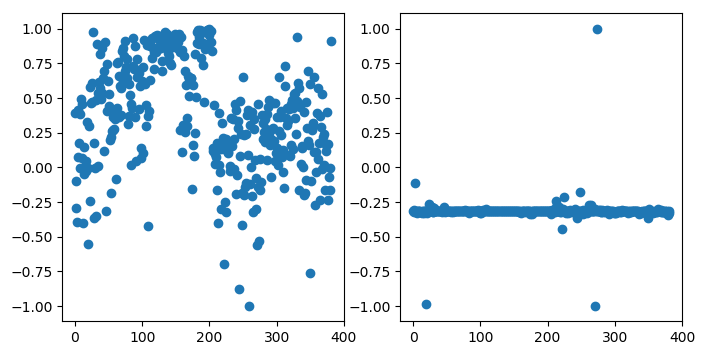

In [67]:
fig,ax = plt.subplots(1,2,figsize=(8,4),sharey=False)
x = evecs_in[snailidx,ev_in[0]]*evals_in[ev_in[0]]*(1)
y = evecs_in[snailidx,ev_in[1]]*evals_in[ev_in[1]]*(1)
x = evecs_in[snailidx,ev_in[0]]*(1)
y = evecs_in[snailidx,ev_in[1]]*(1)
ax[0].scatter(range(len(snailidx)),x)
ax[1].scatter(range(len(snailidx)),y)

In [ ]:


plt.style.use('default')
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['font.family'] = 'DejaVu Sans'
fig,ax = plt.subplots(1,1,figsize=(5,4),sharey=False)
x = evecs_in[snailidx,ev_in[0]]*evals_in[ev_in[0]]*(1)
y = evecs_in[snailidx,ev_in[1]]*evals_in[ev_in[1]]*(1)
x = evecs_in[snailidx,ev_in[0]]*(1)
y = evecs_in[snailidx,ev_in[1]]*(1)
xm = np.zeros(len(udose))
ym = np.zeros(len(udose))
xl = np.zeros(len(udose))
xh = np.zeros(len(udose))
yl = np.zeros(len(udose))
yh = np.zeros(len(udose))

for i in range(len(udose)):
    xidx = np.where(snaillog==udose[i])
    xs = x[xidx]
    ys = y[xidx]
    xm[i] = np.mean(xs)
    ym[i] = np.mean(ys)
    xl[i] = np.percentile(xs,10)
    xh[i] = np.percentile(xs,90)
    yl[i] = np.percentile(ys,10)
    yh[i] = np.percentile(ys,90)
    
print(ym)
print(yh)
print(yl)
fontsize = 24
lw=0.5
msize = 80
fsize = (8,6)

#yellow is weak response
#note evecs are reversed so increasing Smad3 goes from left to right
fig,ax = plt.subplots(1,1,figsize=fsize,sharey=False)
cvec = evecs_out.copy()
c1 = cvec[:,ev_out[0]]
csort = np.argsort(c1)
c1 = range(evecs_in.shape[0])
x = evecs_in[csort,ev_in[0]]*(1)
y = evecs_in[csort,ev_in[1]]*(1)

plt.scatter(x,y,s=msize,c=c1, edgecolor='k',linewidths=lw,cmap = cm.inferno)



sc1 = plt.scatter(xm,ym,s=200,c=udose, linewidth=1, edgecolor='k', marker='o', alpha=1, zorder=10,cmap=cm.inferno)
sc2 = plt.errorbar(xm,ym,yerr=[ym-yl, yh-ym], xerr=[xm-xl, xh-xm], color='k', capsize=5, marker="", alpha=1, ecolor='k',zorder=0)
sc3 = plt.scatter(x,y,s=10,color=[0.5,0.5,0.5],zorder=-5)

plt.xlabel('Smad3 coord1',fontsize=fontsize)
plt.ylabel('Smad3 coord2',fontsize=fontsize)
plt.xticks([-1,-0.5,0,0.5,1],fontsize=fontsize-2)
plt.yticks([-1,-0.5,0,0.5,1],fontsize=fontsize-2)
plt.title('smad 1x2 plotted for groups of increasing snail value (binsize='+str(cellsperbin)+')',fontsize=14)
cbar = plt.colorbar(sc1)
cbar.set_label('Snail coord1',fontsize=fontsize-2)
cbar.ax.tick_params(labelsize=fontsize-4)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.title('Smad3 Manifold',fontsize=fontsize)
savestr = savepath+'S3 manifold colored (ranks)'+'.png'

plt.savefig(savestr,bbox_inches='tight')

ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')

In [ ]:


plt.style.use('default')
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['font.family'] = 'DejaVu Sans'
# fig,ax = plt.subplots(1,1,figsize=(5,4),sharey=False)
x = evecs_in[snailidx,ev_in[0]]*evals_in[ev_in[0]]*(1)
y = evecs_in[snailidx,ev_in[1]]*evals_in[ev_in[1]]*(1)
x = evecs_in[snailidx,ev_in[0]]*(1)
y = evecs_in[snailidx,ev_in[1]]*(1)
xm = np.zeros(len(udose))
ym = np.zeros(len(udose))
xl = np.zeros(len(udose))
xh = np.zeros(len(udose))
yl = np.zeros(len(udose))
yh = np.zeros(len(udose))

for i in range(len(udose)):
    xidx = np.where(snaillog==udose[i])
    xs = x[xidx]
    ys = y[xidx]
    xm[i] = np.mean(xs)
    ym[i] = np.mean(ys)
    xl[i] = np.percentile(xs,10)
    xh[i] = np.percentile(xs,90)
    yl[i] = np.percentile(ys,10)
    yh[i] = np.percentile(ys,90)
    
print(ym)
print(yh)
print(yl)
fontsize = 24
lw=0.5
msize = 80
fsize = (8,6)

#yellow is weak response
#note evecs are reversed so increasing Smad3 goes from left to right
fig,ax = plt.subplots(1,1,figsize=fsize,sharey=False)


sc1 = plt.scatter(xm,ym,s=200,c=udose, linewidth=1, edgecolor='k', marker='o', alpha=1, zorder=10,cmap=cm.inferno)
sc2 = plt.errorbar(xm,ym,yerr=[ym-yl, yh-ym], xerr=[xm-xl, xh-xm], color='k', capsize=5, marker="", alpha=1, ecolor='k',zorder=0)
sc3 = plt.scatter(x,y,s=10,color=[0.5,0.5,0.5],zorder=-5)

plt.xlabel('Smad3 coord1',fontsize=fontsize)
plt.ylabel('Smad3 coord2',fontsize=fontsize)
plt.xticks([-1,-0.5,0,0.5,1],fontsize=fontsize-2)
plt.yticks([-1,-0.5,0,0.5,1],fontsize=fontsize-2)
plt.title('Smad3 manifold (binsize='+str(cellsperbin)+' cells)',fontsize=fontsize)
cbar = plt.colorbar(sc1)
cbar.set_label('Snail coord1',fontsize=fontsize-2)
cbar.ax.tick_params(labelsize=fontsize-4)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
savestr = savepath+'S3 manifold colored BINS (ranks)'+'.png'

plt.savefig(savestr,bbox_inches='tight')

# ax.spines['right'].set_color('k')
# ax.spines['top'].set_color('k')
# ax.spines['left'].set_color('k')
# ax.spines['bottom'].set_color('k')

In [ ]:


plt.style.use('ggplot')
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['font.family'] = 'DejaVu Sans'
fig,ax = plt.subplots(1,1,figsize=(5,4),sharey=False)
x = evecs_in[snailidx,ev_in[0]]*evals_in[ev_in[0]]*(1)
y = evecs_in[snailidx,ev_in[1]]*evals_in[ev_in[1]]*(1)
x = evecs_in[snailidx,ev_in[0]]*(1)
y = evecs_in[snailidx,ev_in[1]]*(1)
xm = np.zeros(2)
ym = np.zeros(2)
xl = np.zeros(2)
xh = np.zeros(2)
yl = np.zeros(2)
yh = np.zeros(2)
# print(yh)
cb = iter([0,1])
for iv in [0, len(udose)-1]:
    xidx = np.where(snaillog==udose[iv])
    i = next(cb)
    xs = x[xidx]
    ys = y[xidx]
    xm[i] = np.mean(xs)
    ym[i] = np.mean(ys)
    xl[i] = np.percentile(xs,10)
    xh[i] = np.percentile(xs,90)
    yl[i] = np.percentile(ys,10)
    yh[i] = np.percentile(ys,90)
#     xf = np.asarray(xidx)
#     print('xf',xf.shape)
    
print(ym)
print(yh)
print(yl)
# print(xidx.shape)
sc1 = plt.scatter(xm,ym,s=200,c=udose[[0,(len(udose)-1)]], linewidth=2, edgecolor='k', marker='o', alpha=1, zorder=10)
sc2 = plt.errorbar(xm,ym,yerr=[ym-yl, yh-ym], xerr=[xm-xl, xh-xm], markeredgewidth=3, color='k', capsize=8, marker="", alpha=1, ecolor='k',zorder=0)

cval = np.asarray([np.asarray(np.where(snaillog==udose[iv]))*iv for iv in [0, len(udose)-1]])
print('cval',cval.flatten())
xx = np.asarray([x[np.where(snaillog==udose[iv])] for iv in [0, len(udose)-1]])
yy = np.asarray([y[np.where(snaillog==udose[iv])] for iv in [0, len(udose)-1]])
print('xx',xx)
sc3 = plt.scatter(xx.flatten(),yy.flatten(),s=10,c=cval.flatten(),zorder=-5,)
plt.xlabel('smad dim1',fontsize=14)
plt.ylabel('smad dim2',fontsize=14)
plt.title('smad 1x2 plotted for groups of increasing snail value (binsize='+str(cellsperbin)+')',fontsize=14)
cbar = plt.colorbar(sc1)
cbar.set_label('Snail dim1',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')

In [ ]:


plt.style.use('ggplot')
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['font.family'] = 'DejaVu Sans'sc3 = plt.scatter(xx.flatten(),yy.flatten(),s=10,c=cval.flatten(),zorder=-5,)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')

In [ ]:
import sklearn
x = evecs_in[:,ev_in[0]]*evals_in[ev_in[0]]*(1)
y = evecs_out[:,ev_out[0]]*evals_out[ev_out[0]]*(1)
outinfo = sklearn.metrics.mutual_info_score(x, y, contingency=None)
print(outinfo)

In [ ]:
#note evecs are reversed so increasing Smad3 goes from left to right
fig,ax = plt.subplots(1,1,figsize=(4,4),sharey=False)
x = evecs_in[:,ev_in[1]]*evals_in[ev_in[1]]*(1)
y = evecs_out[:,ev_out[0]]*evals_out[ev_out[0]]*(1)
plt.scatter(x,y,s=30,c=cc3, edgecolor='k')
plt.xlabel('smad dim2')
plt.ylabel('snail dim1')
cbar = plt.colorbar()
cbar.set_label('Tgfbeta dose')
plt.xlim(-0.0004,0.0004)
# plt.ylim(-0.01,0.01)
# plt.axis('tight')
plt.show()


fig,ax = plt.subplots(1,1,figsize=(4,4),sharey=False)
udose = np.unique(dosage_data)
cmap = plt.cm.viridis(range(len(udose)))
# x = evecs_in[:,ev_in[0]]*evals_in[ev_in[0]]
# y = evecs_out[:,ev_out[0]]*evals_out[ev_out[0]]
print(cmap)
print(cmap[0])
xm = np.zeros(len(udose))
ym = np.zeros(len(udose))
xl = np.zeros(len(udose))
xh = np.zeros(len(udose))
yl = np.zeros(len(udose))
yh = np.zeros(len(udose))
xm[1]=1
print(xm)
for i in range(len(udose)):
    xidx = np.where(dosage_data==udose[i])
    xs = x[xidx]
    ys = y[xidx]
    xm[i] = np.mean(xs)
    ym[i] = np.mean(ys)
    xl[i] = np.percentile(xs,10)
    xh[i] = np.percentile(xs,90)
    yl[i] = np.percentile(ys,10)
    yh[i] = np.percentile(ys,90)
    
# plt.plot(xm,ym,'ko')


plt.errorbar(xm,ym,yerr=[ym-yl, yh-ym], xerr=[xm-xl, xh-xm], color='k', capsize=5, marker="", alpha=1, ecolor='k',zorder=0)
plt.scatter(xm,ym,s=80,c=udose, edgecolor='k', marker='o', alpha=1, zorder=10)
plt.xlabel('smad dim1')
plt.ylabel('snail dim1')
plt.title('bulk correlation seen in dparams')
cbar = plt.colorbar()
cbar.set_label('Tgfbeta dose')
plt.show()


# ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')
# ax.set_title('H, V asymmetric')


In [ ]:
import matplotlib.pyplot as plt

tframe
dmat = np.genfromtxt(datamatrix_path_out, missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
dall = dmat[:,tframe]
dall = ogdout[:,tframe]

fig = plt.figure(figsize=(5,5))
dosageunique = np.unique(dosage_data)
# for i in dosageunique:
for i in [dosageunique[0],dosageunique[-1]]:
    didx = np.where(dosage_data==i)
#     d  = ogdout[didx,tframe]
    d = dall[didx]
    dd = d
    commutes = pd.Series(dd)
    bins = np.linspace(np.percentile(dall,0),np.percentile(dall,100),20)
    
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=dd, bins=bins,
                                alpha=0.2, rwidth=1,zorder=10,density=True,histtype='stepfilled',edgecolor='k')
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Snail response histograms')
#     plt.text(0, 0, r'$\mu=15, b=3$')
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
#     plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

In [ ]:
### plot snail response vs Smad response (Diffusion Maps) for only highest dose
#note evecs are reversed so increasing Smad3 goes from left to right
fig,ax = plt.subplots(1,1,figsize=(4,4),sharey=False)


didx = np.ones(dosage_data.shape,dtype=bool)
x = evecs_in[didx,ev_in[0]]*evals_in[ev_in[0]]*(1)
y = evecs_out[didx,ev_out[0]]*evals_out[ev_out[0]]*(1)
plt.scatter(x,y,s=10,color=[0.5,0.5,0.5], edgecolor=None)

ud = np.unique(dosage_data)
didx = np.where(dosage_data==np.max(ud))
didx = didx[0]
x = evecs_in[didx,ev_in[0]]*evals_in[ev_in[0]]*(1)
y = evecs_out[didx,ev_out[0]]*evals_out[ev_out[0]]*(1)
plt.scatter(x,y,s=40,c=cc3[didx], edgecolor='k')
plt.xlabel('smad dim1')
plt.ylabel('snail dim1')
cbar = plt.colorbar()
cbar.set_label('Tgfbeta dose')
plt.xlim(np.percentile(x,0),np.percentile(x,100))
plt.ylim(np.percentile(y,0),np.percentile(y,100))
plt.show()

In [ ]:
# entropydiffRS = calculateEntropyRS(responsesGivenSvectorarray,numberOfSignals,q,lengthOfFeatures,k,assembledFeatures,dimensions);
# %unconditional entropy, H(R)
# entropydiffR = calculateEntropyR(responsesGivenSvectorarray,numberOfSignals,q,lengthOfFeatures,k,assembledFeatures,dimensions);

# iyo(inputcyclenum,:) = entropydiffR - entropydiffRS;


x = evecs_in[:,ev_in[0]]*evals_in[ev_in[0]]
y = evecs_in[:,ev_in[1]]*evals_in[ev_in[1]]
z = evecs_out[:,ev_out[0]]*evals_out[ev_out[0]]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x,y,zs=z)
